In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Read The Data

In [3]:
df = pd.read_csv('SCMS.csv')

In [4]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

Further, will change Data Type for Columns that are not properly assigned.

In [7]:
df.shape

(10324, 33)

###### No. of Rows = 10324 , No. of Columns = 33 

###### Check for Duplicates

In [8]:
df.duplicated().value_counts()

False    10324
Name: count, dtype: int64

######  Overall Statistical Analysis

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10324.0,NaN,NaN,NaN,51098.968229,31944.332496,1.0,12795.75,57540.5,83648.25,86823.0
Project Code,10324,142,116-ZA-T30,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PQ #,10324,1237,Pre-PQ Process,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO / SO #,10324,6233,SCMS-199289,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASN/DN #,10324,7030,ASN-19166,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10324,43,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Managed By,10324,4,PMO - US,10265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill Via,10324,2,From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor INCO Term,10324,8,N/A - From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipment Mode,9964,4,Air,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

###### Convert Columns Names to Lower String

In [11]:
df.columns=df.columns.str.lower()

In [12]:
df.columns=df.columns.str.replace(" ","_")

In [13]:
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

#### id: It is likely a unique identifier for each entry in dataset.
#### project_code: An identifier for the project associated with the data entry.
#### pq_#: It is possibly a identifier related to pre-qualification processes.                                                        
####  Columns like "ID," "Project Code," and "PQ #" are identifiers or reference numbers that help track and manage data but do not directly affect consignment pricing or logistics. So, drop these columns as they do not play any role in Consignment Pricing.

In [14]:
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

###### Check for Null Values

In [15]:
df.isnull().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
w

In [16]:
# Data contains columns with Missing Values.
data=df[["shipment_mode","dosage","line_item_insurance_(usd)"]]

In [17]:
data

,shipment_mode,dosage,line_item_insurance_(usd)
0,Air,NaN,NaN
1,Air,10mg/ml,NaN
2,Air,NaN,NaN
3,Air,150mg,NaN
4,Air,30mg,NaN
...,...,...,...
10319,Truck,30/50/60mg,705.79
10320,Truck,150/300mg,161.71
10321,Truck,600/300/300mg,5284.04
10322,Truck,150/300mg,134.03


###### Fill or Drop Null Values

In [18]:
data.isna().sum()

shipment_mode                 360
dosage                       1736
line_item_insurance_(usd)     287
dtype: int64

In [19]:
data["shipment_mode"].value_counts(dropna=False)

shipment_mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
NaN             360
Name: count, dtype: int64

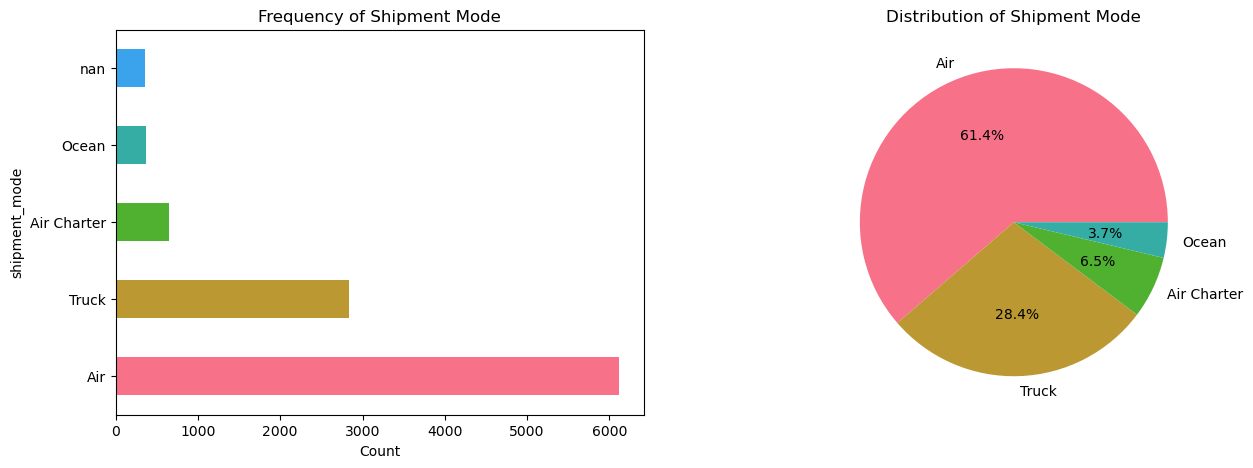

In [20]:
colors = sns.color_palette('husl')

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
data["shipment_mode"].value_counts(dropna=False).plot.barh(color=colors)
plt.title("Frequency of Shipment Mode")
plt.xlabel("Count")

ax1 = fig.add_subplot(122)
plt.pie(data["shipment_mode"].value_counts(), labels=data["shipment_mode"].value_counts().index, autopct='%1.1f%%', colors=colors)
plt.title("Distribution of Shipment Mode")
plt.show()

In [21]:
data["shipment_mode"].fillna("Air",inplace=True)

In [22]:
data["shipment_mode"].value_counts(dropna=False)

shipment_mode
Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [23]:
data["dosage"].value_counts()

dosage
300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/

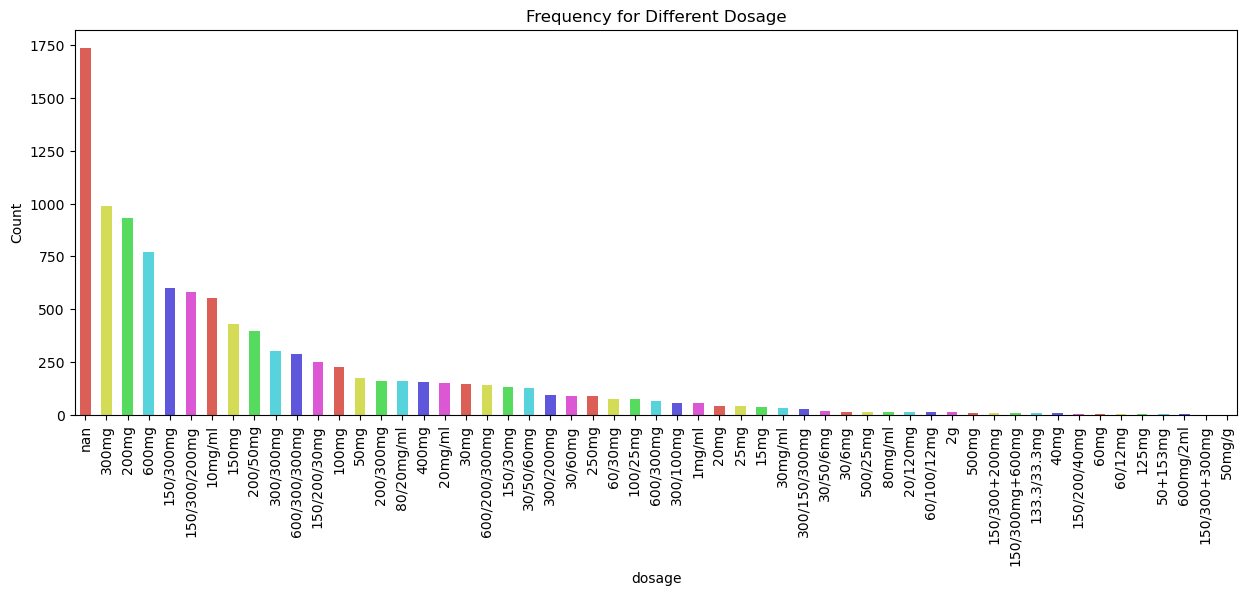

In [24]:
colors = sns.color_palette('hls')

fig = plt.figure(figsize=(15, 5))
data["dosage"].value_counts(dropna=False).plot.bar(color=colors)
plt.title("Frequency for Different Dosage")
plt.ylabel("Count")
plt.show()

#### Dosage is a characteristic of the product being shipped, which may influence the packaging or handling instructions but does not directly impact consignment pricing.

In [25]:
data.drop("dosage",axis=1,inplace=True)

In [26]:
data["line_item_insurance_(usd)"].value_counts()

line_item_insurance_(usd)
0.00      54
0.02      37
0.07      33
0.06      30
0.05      30
          ..
381.78     1
858.86     1
332.18     1
222.58     1
85.82      1
Name: count, Length: 6722, dtype: int64

In [27]:
data["line_item_insurance_(usd)"]=data["line_item_insurance_(usd)"].replace({"NaN":np.nan})

In [28]:
data["line_item_insurance_(usd)"].fillna(data["line_item_insurance_(usd)"].median)

0        <bound method NDFrame._add_numeric_operations....
1        <bound method NDFrame._add_numeric_operations....
2        <bound method NDFrame._add_numeric_operations....
3        <bound method NDFrame._add_numeric_operations....
4        <bound method NDFrame._add_numeric_operations....
                               ...                        
10319                                               705.79
10320                                               161.71
10321                                              5284.04
10322                                               134.03
10323                                                85.82
Name: line_item_insurance_(usd), Length: 10324, dtype: object

In [29]:
data["line_item_insurance_(usd)"].median()

47.04

In [30]:
data["line_item_insurance_(usd)"].fillna(47.04,inplace=True)

In [31]:
data.head()

,shipment_mode,line_item_insurance_(usd)
0,Air,47.04
1,Air,47.04
2,Air,47.04
3,Air,47.04
4,Air,47.04


In [32]:
df.head()

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,02-06-2006 00:00,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-11-2006 00:00,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-08-2006 00:00,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,01-09-2006 00:00,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-08-2006 00:00,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [33]:
df.drop(["shipment_mode","line_item_insurance_(usd)","dosage"],axis=1,inplace=True)

###### Combine df and data 

In [34]:
df=pd.concat([df,data],axis=1)

###### Determine Categorical Columns

In [35]:
categorical_cols=[x for x in df.columns if df[x].dtypes=="O"]

In [36]:
categorical_cols

['po_/_so_#',
 'asn/dn_#',
 'country',
 'managed_by',
 'fulfill_via',
 'vendor_inco_term',
 'pq_first_sent_to_client_date',
 'po_sent_to_vendor_date',
 'scheduled_delivery_date',
 'delivered_to_client_date',
 'delivery_recorded_date',
 'product_group',
 'sub_classification',
 'vendor',
 'item_description',
 'molecule/test_type',
 'brand',
 'dosage_form',
 'manufacturing_site',
 'first_line_designation',
 'weight_(kilograms)',
 'freight_cost_(usd)',
 'shipment_mode']

In [37]:
categorical_df = df[categorical_cols]

In [38]:
categorical_df

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,...,vendor,item_description,molecule/test_type,brand,dosage_form,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),shipment_mode
0,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,02-06-2006 00:00,02-06-2006 00:00,...,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,Test kit,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,Air
1,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,14-11-2006 00:00,14-11-2006 00:00,...,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,Oral suspension,"Aurobindo Unit III, India",Yes,358,4521.5,Air
2,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Pre-PQ Process,Date Not Captured,27-08-2006 00:00,27-08-2006 00:00,...,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,Air
3,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,01-09-2006 00:00,01-09-2006 00:00,...,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,Tablet,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,Air
4,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,11-08-2006 00:00,11-08-2006 00:00,...,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,Capsule,"Aurobindo Unit III, India",Yes,7590,45450.08,Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,10/16/14,N/A - From RDC,31-07-2015 00:00,15-07-2015 00:00,...,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,Chewable/dispersible tablet - FDC,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),Truck
10320,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,10/24/14,N/A - From RDC,31-07-2015 00:00,06-08-2015 00:00,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,Tablet - FDC,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),Truck
10321,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,08-12-2014 00:00:00,N/A - From RDC,31-08-2015 00:00,25-08-2015 00:00,...,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,Tablet - FDC,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,Truck
10322,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,07-01-2015 00:00:00,N/A - From RDC,09-09-2015 00:00,04-08-2015 00:00,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,Tablet - FDC,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,Truck


###### Determine Numerical Columns

In [39]:
numerical_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]

In [40]:
numerical_cols

['unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'line_item_insurance_(usd)']

In [41]:
numerical_df = df[numerical_cols]

In [42]:
numerical_df

,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,line_item_insurance_(usd)
0,30,19,551.00,29.00,0.97,47.04
1,240,1000,6200.00,6.20,0.03,47.04
2,100,500,40000.00,80.00,0.80,47.04
3,60,31920,127360.80,3.99,0.07,47.04
4,60,38000,121600.00,3.20,0.05,47.04
...,...,...,...,...,...,...
10319,60,166571,599655.60,3.60,0.06,705.79
10320,60,21072,137389.44,6.52,0.11,161.71
10321,30,514526,5140114.74,9.99,0.33,5284.04
10322,60,17465,113871.80,6.52,0.11,134.03


###### User-Define Function for Plotting

In [43]:
def plot(df, col_name):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))  
    
    df[col_name].value_counts().plot(kind='barh', ax=ax0)
    ax0.set_title("Count for Categories of {} column".format(col_name))
    ax0.set_xlabel("Count")
    ax0.set_ylabel(col_name)
    
    df[col_name].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
    ax1.set_title("Distribution of Categories for {} Column".format(col_name))
    ax1.set_ylabel("")  
    
    plt.tight_layout()  
    plt.show()

In [44]:
def reorder(df):
    df_split=df.split("-")
    df_return=df_split[0]
    return df_return

###### Analyze Columns

Checking Unique Values in Columns for Categorical Data

In [45]:
categorical_df.nunique()

po_/_so_#                       6233
asn/dn_#                        7030
country                           43
managed_by                         4
fulfill_via                        2
vendor_inco_term                   8
pq_first_sent_to_client_date     765
po_sent_to_vendor_date           897
scheduled_delivery_date         2006
delivered_to_client_date        2093
delivery_recorded_date          2042
product_group                      5
sub_classification                 6
vendor                            73
item_description                 184
molecule/test_type                86
brand                             48
dosage_form                       17
manufacturing_site                88
first_line_designation             2
weight_(kilograms)              4688
freight_cost_(usd)              6733
shipment_mode                      4
dtype: int64

##### Univariate Analysis

###### 1. po_/_so_# - Purchase Order or Sales Order

In [46]:
categorical_df['po_/_so_#'].value_counts()

po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: count, Length: 6233, dtype: int64

In [47]:
df["po_/_so_#"]=df["po_/_so_#"].apply(reorder)

In [48]:
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5404
SCMS    4919
DSCM       1
Name: count, dtype: int64

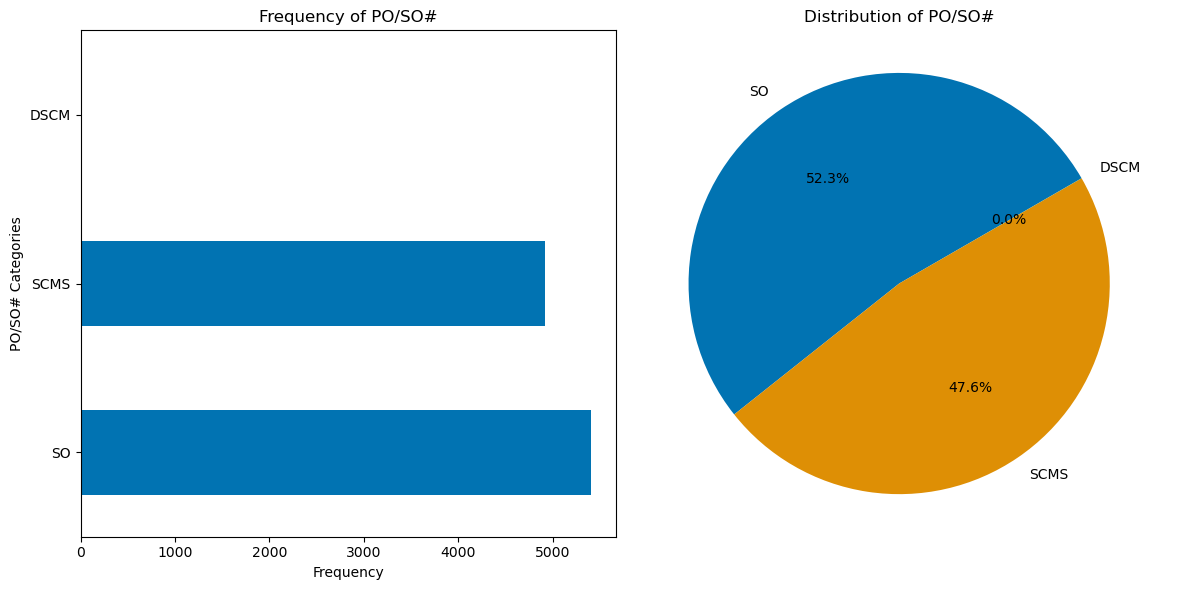

In [49]:
sns.set_palette("colorblind")
value_counts = df["po_/_so_#"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of PO/SO#")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("PO/SO# Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of PO/SO#")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 2. asn/dn_# - Advanced Shipping Notice or Delivery Note

In [50]:
categorical_df['asn/dn_#'].value_counts()

asn/dn_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

In [51]:
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)

In [52]:
df["asn/dn_#"].value_counts()

asn/dn_#
DN     5404
ASN    4920
Name: count, dtype: int64

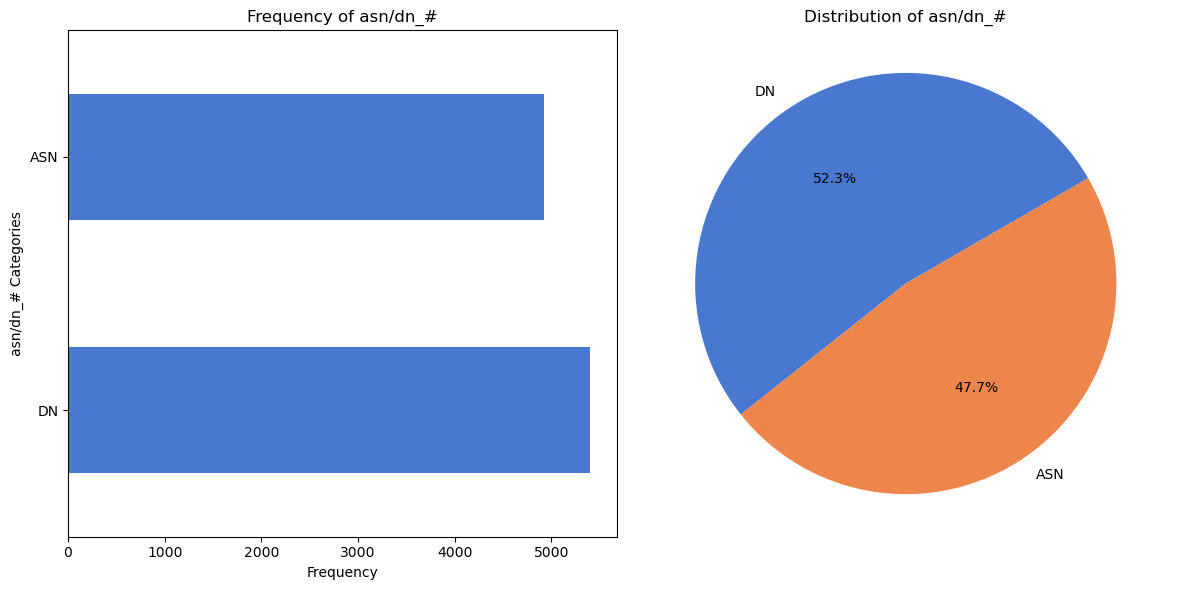

In [53]:
sns.set_palette("muted")
value_counts = df["asn/dn_#"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of asn/dn_#")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("asn/dn_# Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of asn/dn_#")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 3. Country 

In [54]:
df["country"].value_counts()

country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

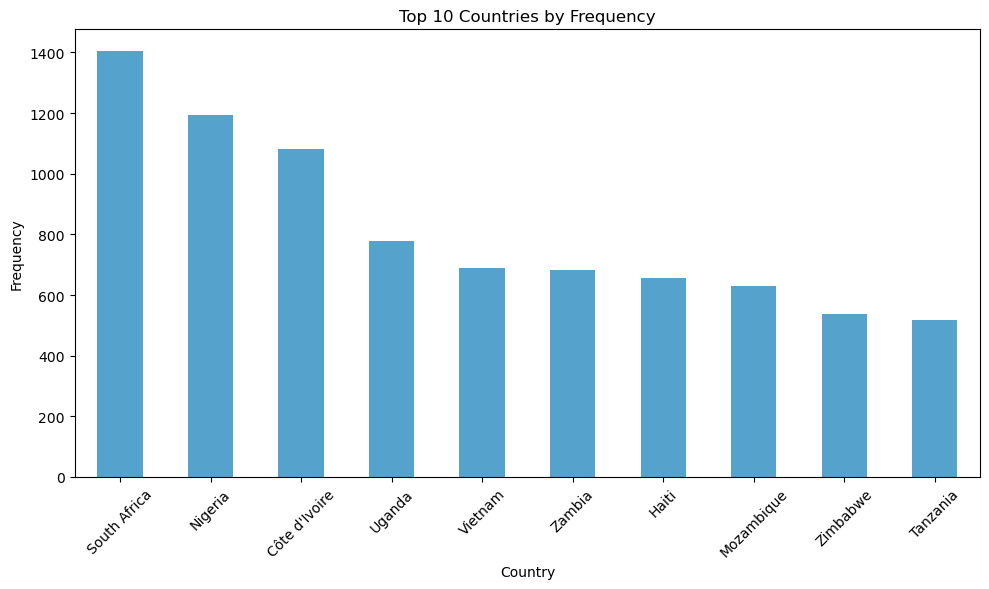

In [55]:
top_10_countries = df["country"].value_counts().head(10)
sns.set_palette("icefire")

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

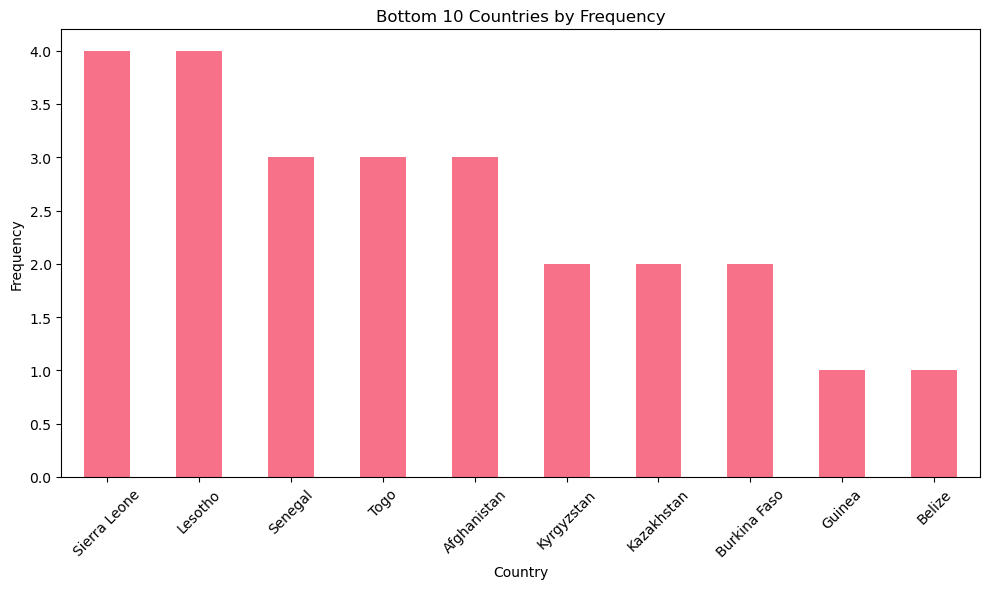

In [56]:
bottom_10_countries = df["country"].value_counts().tail(10)
sns.set_palette("husl")

plt.figure(figsize=(10, 6))
bottom_10_countries.plot(kind='bar')
plt.title('Bottom 10 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### 4. Managed By

In [57]:
df["managed_by"].value_counts()

managed_by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

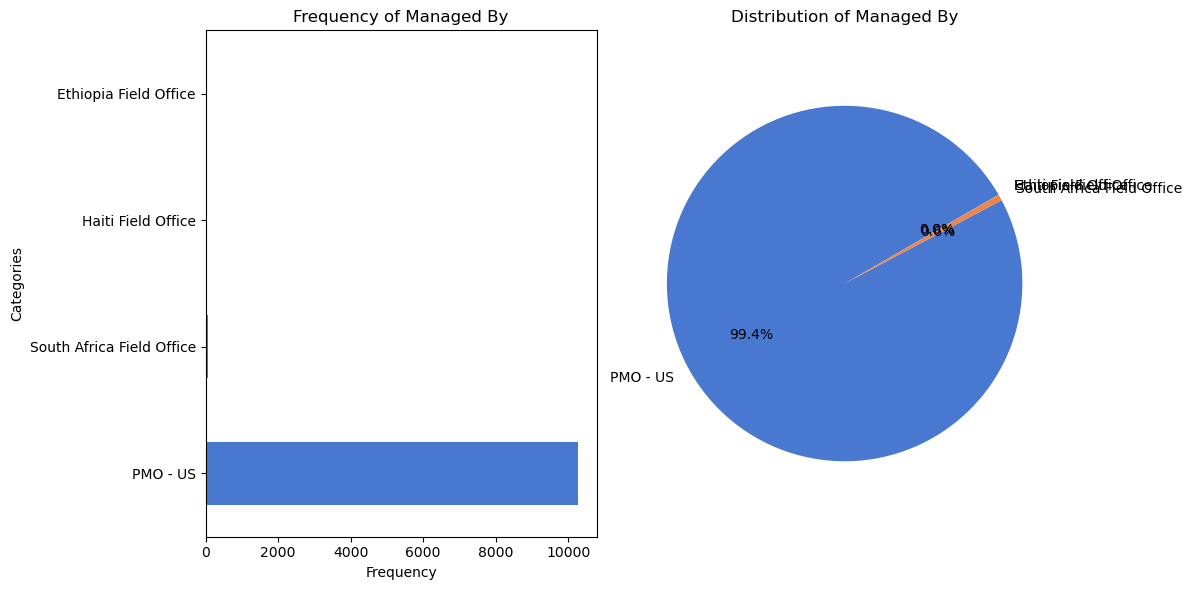

In [58]:
sns.set_palette("muted")
value_counts = df["managed_by"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of Managed By")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Managed By")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 5. Fulfill Via

In [59]:
df["fulfill_via"].value_counts()

fulfill_via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

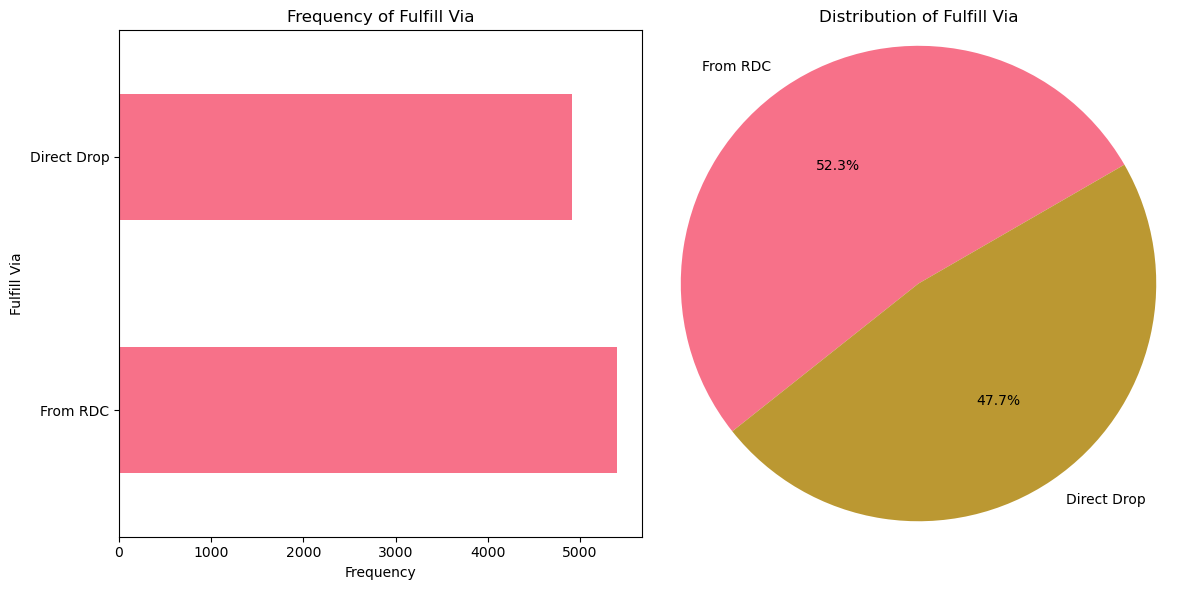

In [60]:
sns.set_palette("husl")
value_counts = df["fulfill_via"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of Fulfill Via")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Fulfill Via")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Fulfill Via")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 6. Vendor INCO Term

In [61]:
df["vendor_inco_term"].value_counts()

vendor_inco_term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [62]:
df["vendor_inco_term"]=df["vendor_inco_term"].replace(["DDU","DAP","CIF"],"others")

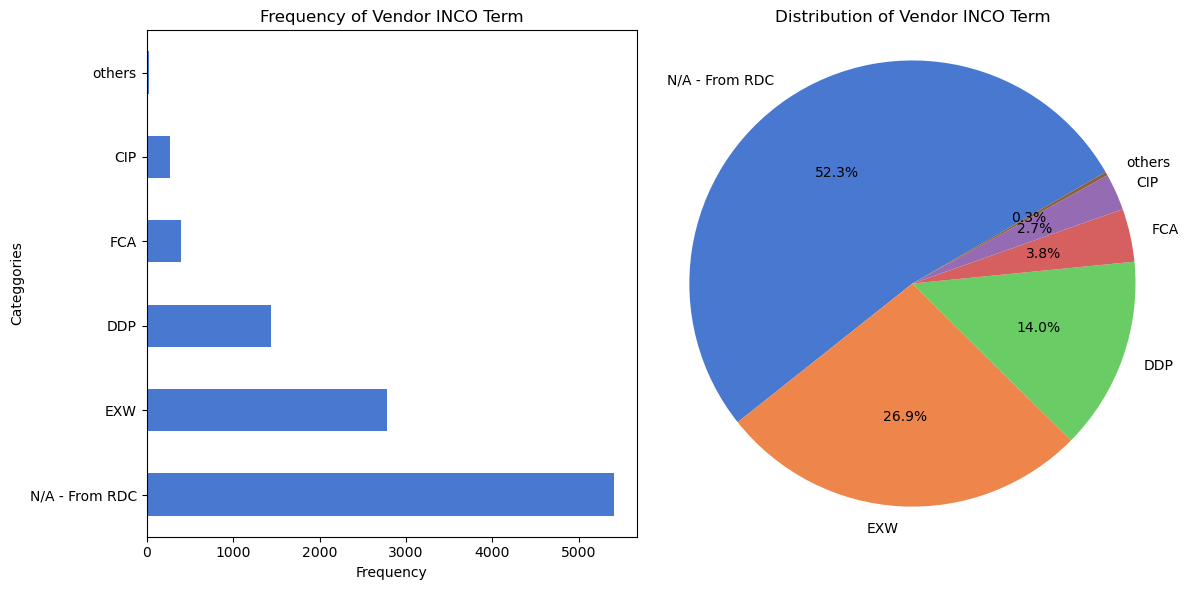

In [63]:
sns.set_palette("muted")
value_counts = df["vendor_inco_term"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of Vendor INCO Term")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Categgories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Vendor INCO Term")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 7. PQ First Sent to Client Date

In [64]:
df["pq_first_sent_to_client_date"].value_counts()

pq_first_sent_to_client_date
Pre-PQ Process         2476
Date Not Captured       205
09-11-2014 00:00:00     205
07-11-2013 00:00:00     173
4/30/14                 123
                       ... 
7/29/10                   1
10-03-2011 00:00:00       1
12/17/13                  1
02-05-2015 00:00:00       1
8/29/13                   1
Name: count, Length: 765, dtype: int64

In [65]:
df["pq_first_sent_to_client_date"].nunique()

765

In [66]:
df["pq_first_sent_to_client_date"].min()

'01-02-2012 00:00:00'

In [67]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [68]:
def client_dates(date):
    if date == "Pre-PQ Process":
        return pd.to_datetime('01/06/2009', format="%d/%m/%Y")
    elif date == "Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date) < 9:
            date = pd.to_datetime(date, format="%m/%d/%y")
            return date
        else:
            date = date.split()[0] 
            date = date.replace("-", "/")
            date = pd.to_datetime(date, format="%d/%m/%Y")
            return date

In [69]:
df["pq_first_sent_to_client_date"] = df["pq_first_sent_to_client_date"].apply(client_dates)

###### 8. PO Sent to Vendor Date

In [70]:
df["po_sent_to_vendor_date"].value_counts()

po_sent_to_vendor_date
N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
                     ... 
5/18/15                 1
41914                   1
10/16/13                1
40798                   1
8/29/12                 1
Name: count, Length: 897, dtype: int64

##### Dropping Column as It'st Infomation is captured from RDC which is Categorical and Unknown.

In [71]:
df.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

###### 9. Scheduled Delivery Date

In [72]:
df["scheduled_delivery_date"].value_counts()

scheduled_delivery_date
29-08-2014 00:00    97
16-03-2012 00:00    83
27-08-2014 00:00    63
31-05-2010 00:00    62
31-01-2014 00:00    60
                    ..
02-02-2010 00:00     1
29-01-2015 00:00     1
09-09-2010 00:00     1
04-04-2015 00:00     1
09-09-2015 00:00     1
Name: count, Length: 2006, dtype: int64

In [73]:
def transform_date(data):
    date = pd.to_datetime(data, format="%d-%m-%Y %H:%M", errors='coerce')
    return date

In [74]:
df["scheduled_delivery_date"] = df["scheduled_delivery_date"].apply(transform_date)

In [75]:
df["pq_first_sent_to_client_date"] = df["pq_first_sent_to_client_date"].apply(transform_date)

###### 10. Delivered to Client Date

In [76]:
df["delivered_to_client_date"].value_counts()

delivered_to_client_date
29-08-2014 00:00    74
27-08-2014 00:00    66
14-02-2012 00:00    60
28-06-2010 00:00    60
16-04-2013 00:00    59
                    ..
01-11-2014 00:00     1
31-03-2014 00:00     1
28-09-2012 00:00     1
08-09-2015 00:00     1
16-04-2015 00:00     1
Name: count, Length: 2093, dtype: int64

In [77]:
df["delivered_to_client_date"]=df["delivered_to_client_date"].apply(transform_date)

###### 11. Delivery Recorded Date

In [78]:
df["delivery_recorded_date"]=df["delivery_recorded_date"].apply(transform_date)

###### 12. Product Group

In [79]:
df["product_group"].value_counts()

product_group
ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

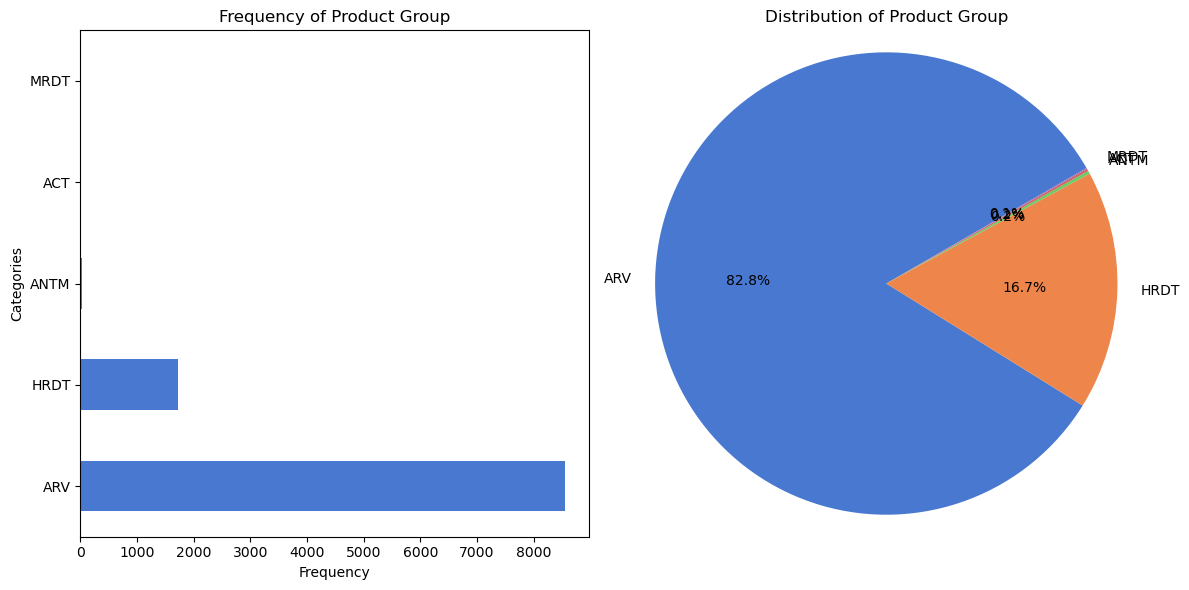

In [80]:
sns.set_palette("muted")
value_counts = df["product_group"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of Product Group")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Product Group")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 13. Sub-Classification Group

In [81]:
df["sub_classification"].value_counts()

sub_classification
Adult                   6595
Pediatric               1955
HIV Test                1567
HIV Test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

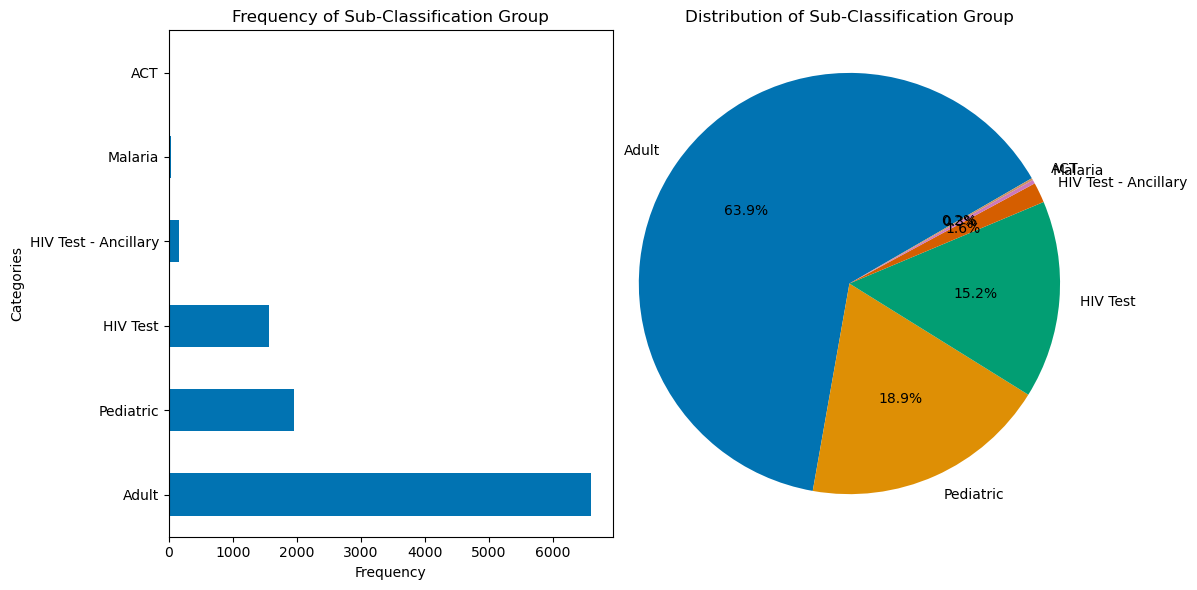

In [82]:
sns.set_palette("colorblind")
value_counts = df["sub_classification"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of Sub-Classification Group")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of Sub-Classification Group")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

###### 14. Vendor

In [83]:
df["vendor"].value_counts()

vendor
SCMS from RDC                                   5404
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: count, Length: 73, dtype: int64

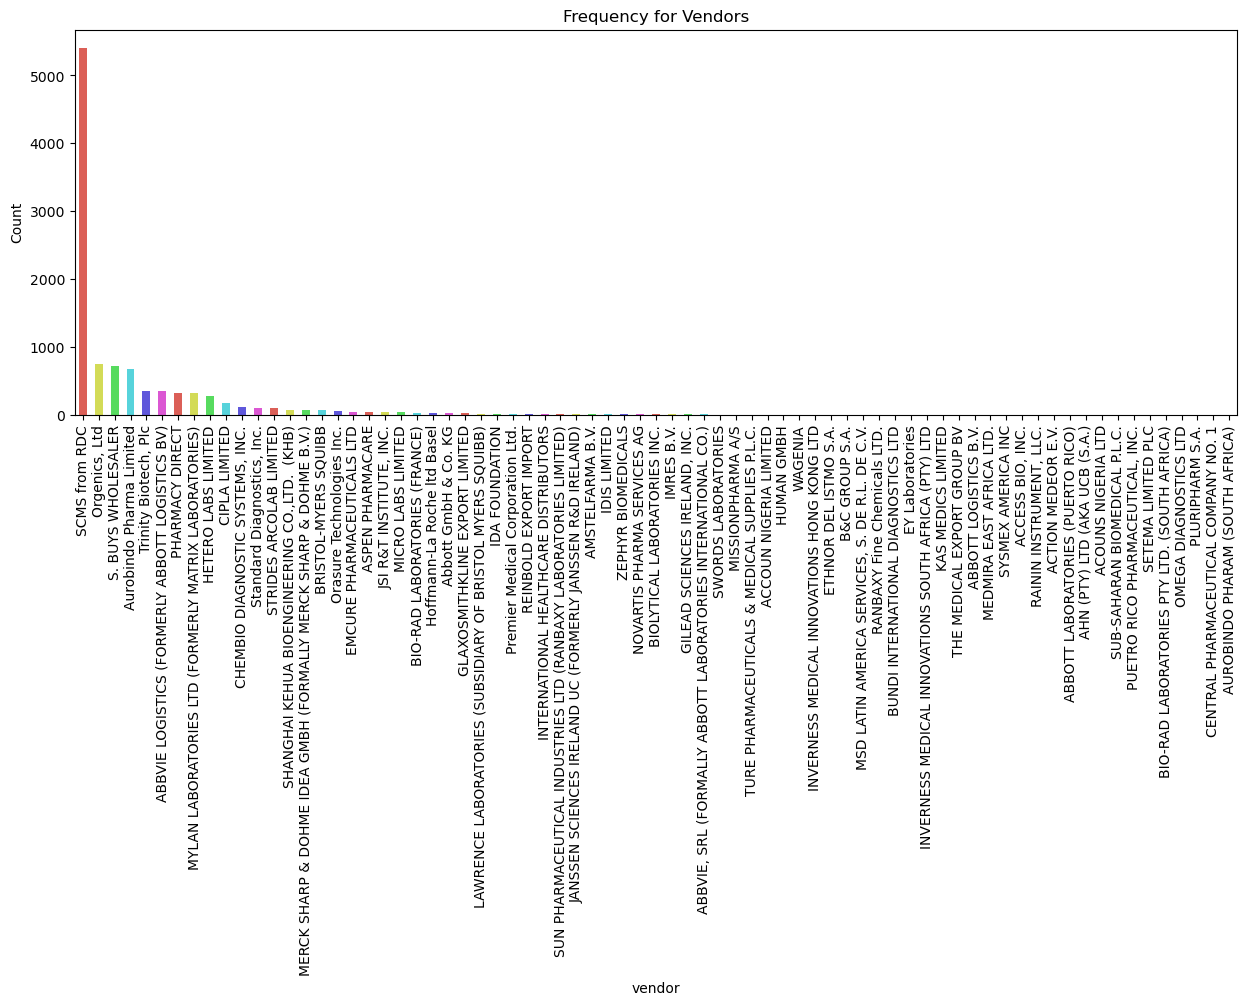

In [84]:
colors = sns.color_palette('hls')

fig = plt.figure(figsize=(15, 5))
df["vendor"].value_counts().plot.bar(color=colors)
plt.title("Frequency for Vendors")
plt.ylabel("Count")
plt.show()

The "vendor" column is highly biased towards certain vendors, it could potentially introduce bias into analysis or modeling tasks. Biased data may lead to skewed insights or inaccurate predictions.

In [85]:
df.drop("vendor",axis=1,inplace=True)

###### 15. Item Description

In [86]:
df["item_description"].value_counts()

item_description
Efavirenz 600mg, tablets, 30 Tabs                                                755
Nevirapine 200mg, tablets, 60 Tabs                                               623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: count, Length: 184, dtype: int64

###### 16. Molecule / Test Type

In [87]:
df["molecule/test_type"].value_counts()

molecule/test_type
Efavirenz                           1125
Nevirapine                           877
Lamivudine/Nevirapine/Zidovudine     707
Lamivudine/Zidovudine                689
Lopinavir/Ritonavir                  633
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

These columns may contain information that overlaps with other columns, such as "Product Group" or "Sub Classification." The information they provide is already captured elsewhere, keeping them might introduce redundancy without adding significant value. The specific molecules or test types and item descriptions may not have strong predictive power for analysis tasks.

In [88]:
df.drop("item_description",axis=1,inplace=True)

In [89]:
df.drop("molecule/test_type",axis=1,inplace=True)

###### 17. Brand

In [90]:
df["brand"].value_counts()

brand
Generic            7285
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             165
Norvir              136
Stat-Pak            115
Bioline             113
Truvada              94
Videx                84
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Invirase             53
Viread               52
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

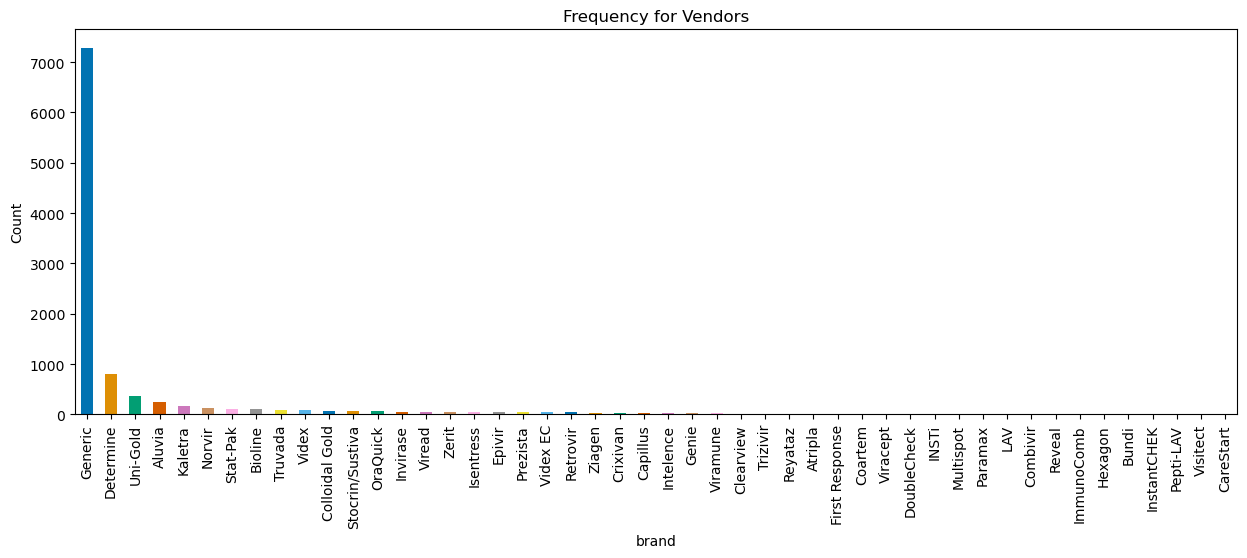

In [91]:
colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(15, 5))
df["brand"].value_counts().plot.bar(color=colors)
plt.title("Frequency for Vendors")
plt.ylabel("Count")
plt.show()

###### 18. Dosage Form

In [92]:
df["dosage_form"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                 Test kit
1                          Oral suspension
2                                 Test kit
3                                   Tablet
4                                  Capsule
                       ...                
10319    Chewable/dispersible tablet - FDC
10320                         Tablet - FDC
10321                         Tablet - FDC
10322                         Tablet - FDC
10323    Chewable/dispersible tablet - FDC
Name: dosage_form, Length: 10324, dtype: object>

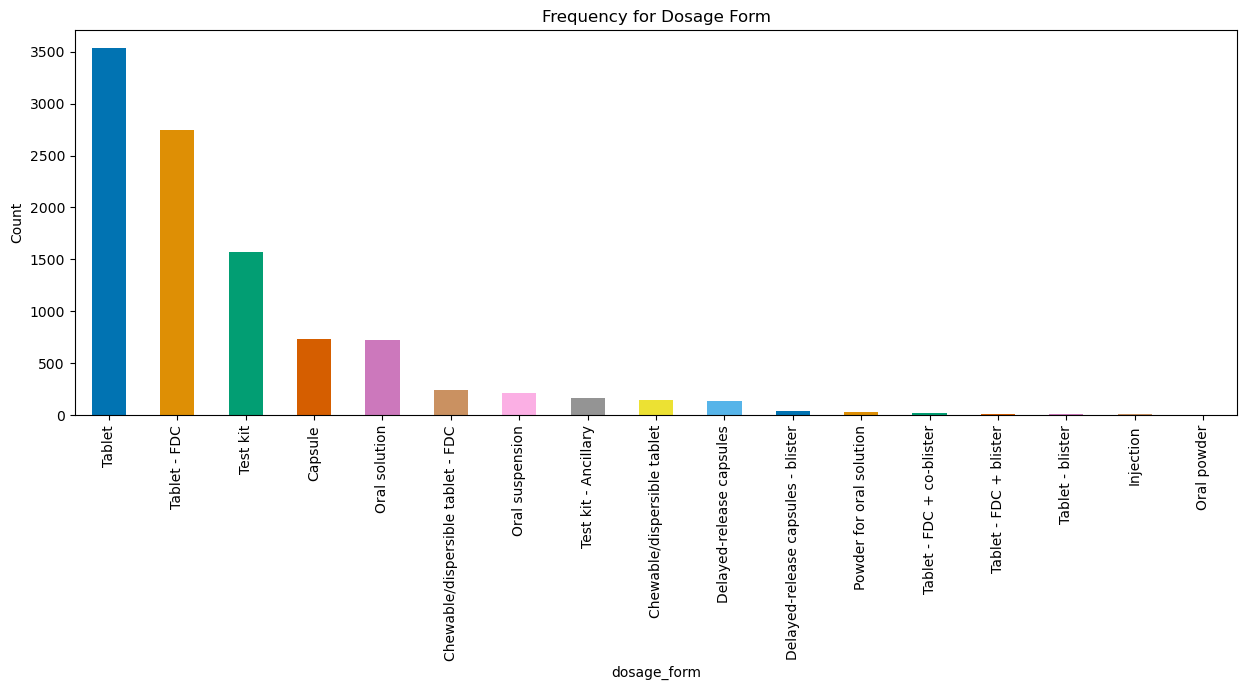

In [93]:
colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(15, 5))
df["dosage_form"].value_counts().plot.bar(color=colors)
plt.title("Frequency for Dosage Form")
plt.ylabel("Count")
plt.show()

Dosage and Dosage Form are similar and does not affect Consignment Pricing.

In [94]:
df.drop("dosage_form",axis=1,inplace=True)

###### 19. Unit of Measure

In [95]:
df["unit_of_measure_(per_pack)"].value_counts()

unit_of_measure_(per_pack)
60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: count, dtype: int64

In [96]:
df["unit_of_measure_(per_pack)"].dtype

dtype('int64')

###### 20. Line Item Quantity

In [97]:
df["line_item_quantity"].value_counts()

line_item_quantity
10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: count, Length: 5065, dtype: int64

###### 21. Line Item Value

In [98]:
df["line_item_value"].value_counts()

line_item_value
200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
415552.08     1
561.46        1
438340.92     1
2604.00       1
72911.61      1
Name: count, Length: 8741, dtype: int64

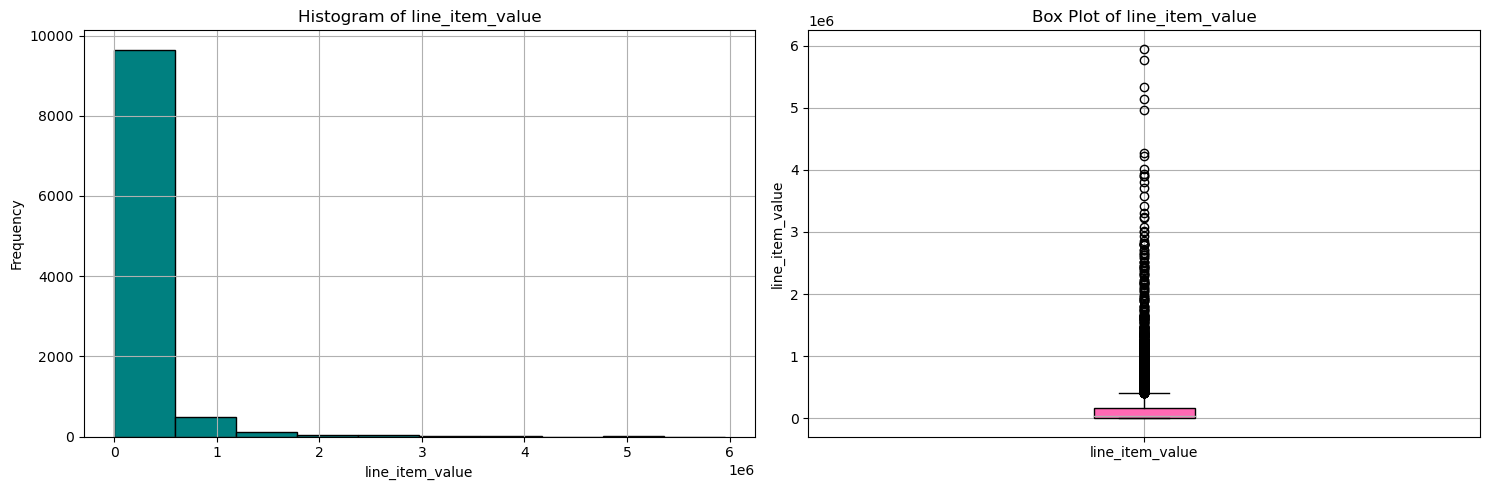

In [99]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df['line_item_value'].plot(kind='hist', color='teal', edgecolor='black', ax=ax1)
ax1.set_title('Histogram of line_item_value')
ax1.set_xlabel('line_item_value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

df.boxplot(column='line_item_value', ax=ax2, patch_artist=True, boxprops=dict(facecolor='hotpink'))
ax2.set_title('Box Plot of line_item_value')
ax2.set_ylabel('line_item_value')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [100]:
df.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'pq_first_sent_to_client_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'brand', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'shipment_mode', 'line_item_insurance_(usd)'],
      dtype='object')

###### 22. Unit Price

In [101]:
df["unit_price"].describe()

count    10324.000000
mean         0.611701
std          3.275808
min          0.000000
25%          0.080000
50%          0.160000
75%          0.470000
max        238.650000
Name: unit_price, dtype: float64

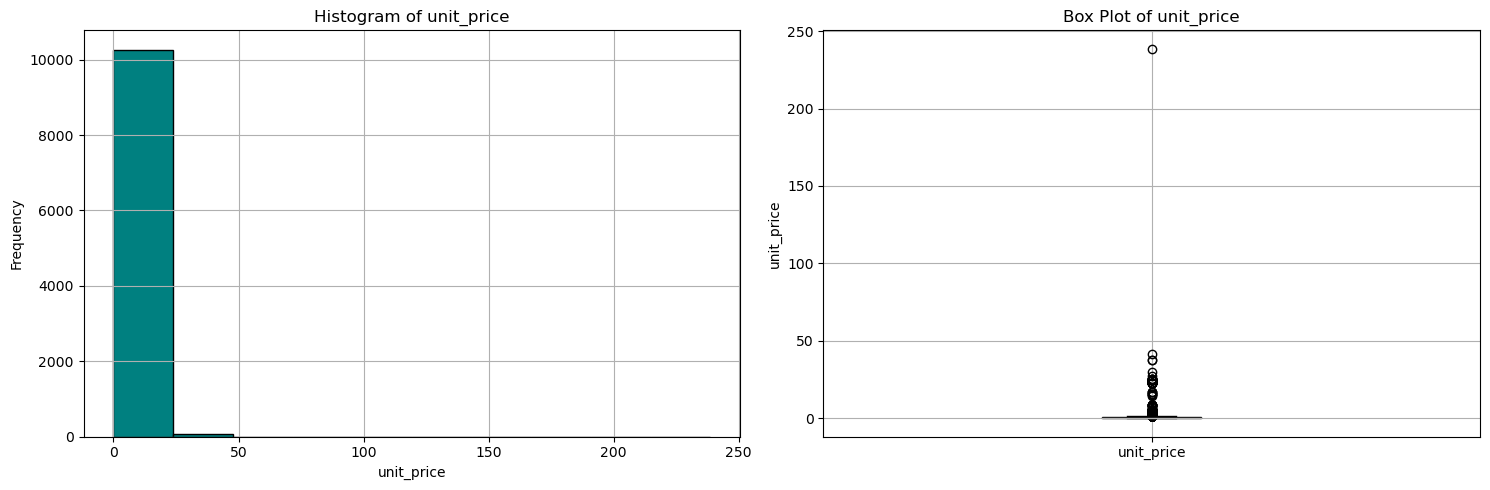

In [102]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df['unit_price'].plot(kind='hist', color='teal', edgecolor='black', ax=ax1)
ax1.set_title('Histogram of unit_price')
ax1.set_xlabel('unit_price')
ax1.set_ylabel('Frequency')
ax1.grid(True)

df.boxplot(column='unit_price', ax=ax2, patch_artist=True, boxprops=dict(facecolor='hotpink'))
ax2.set_title('Box Plot of unit_price')
ax2.set_ylabel('unit_price')
ax2.grid(True)

plt.tight_layout()
plt.show()

###### 23. Manufacturing Site

In [103]:
df["manufacturing_site"].value_counts()

manufacturing_site
Aurobindo Unit III, India              3172
Mylan (formerly Matrix) Nashik         1415
Hetero Unit III Hyderabad IN            869
Cipla, Goa, India                       665
Strides, Bangalore, India.              540
                                       ... 
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
OMEGA Diagnostics, UK                     1
ABBSP                                     1
Medochemie Factory A, CY                  1
Name: count, Length: 88, dtype: int64

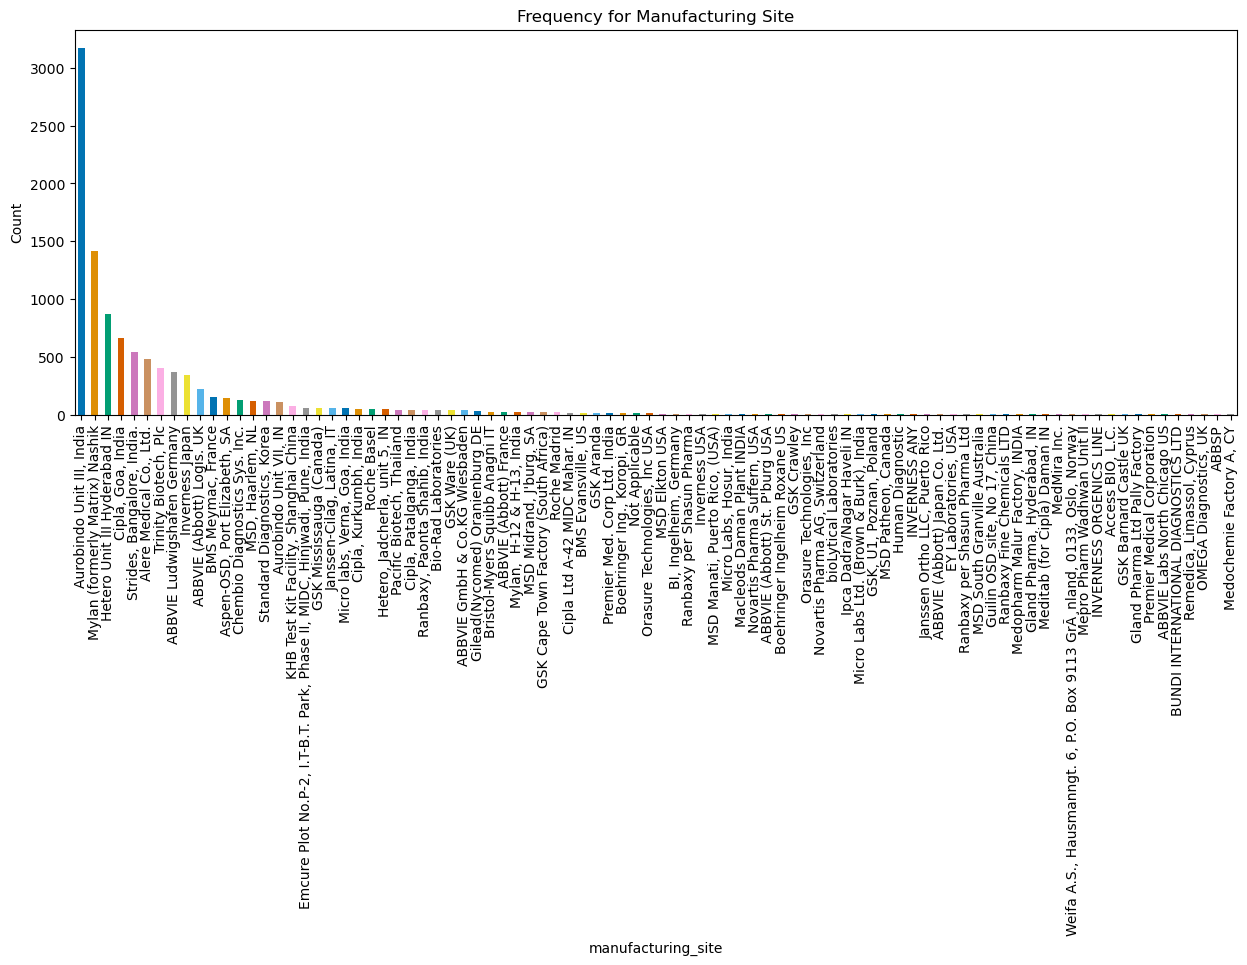

In [104]:
colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(15, 5))
df["manufacturing_site"].value_counts().plot.bar(color=colors)
plt.title("Frequency for Manufacturing Site")
plt.ylabel("Count")
plt.show()

In [105]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=50:
        other_cat.append(key)

In [106]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

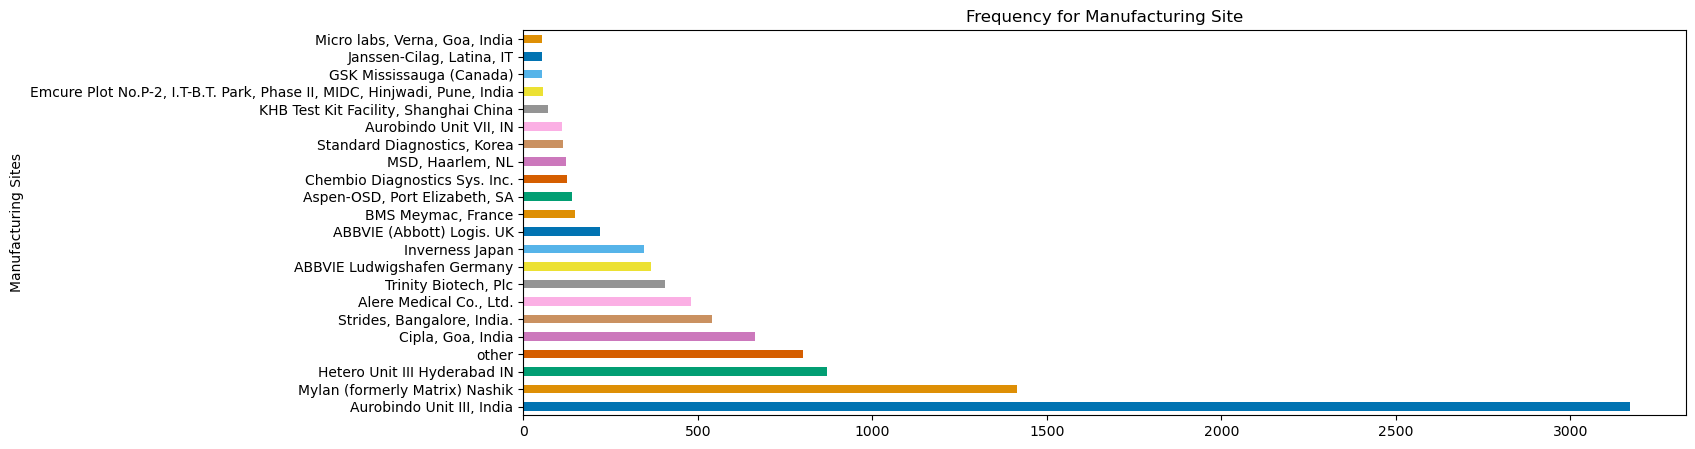

In [107]:
colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(15, 5))
df["manufacturing_site"].value_counts().plot.barh(color=colors)
plt.title("Frequency for Manufacturing Site")
plt.ylabel("Manufacturing Sites")
plt.show()

###### 24.  First Line Designation

In [108]:
df["first_line_designation"].value_counts()

first_line_designation
Yes    7030
No     3294
Name: count, dtype: int64

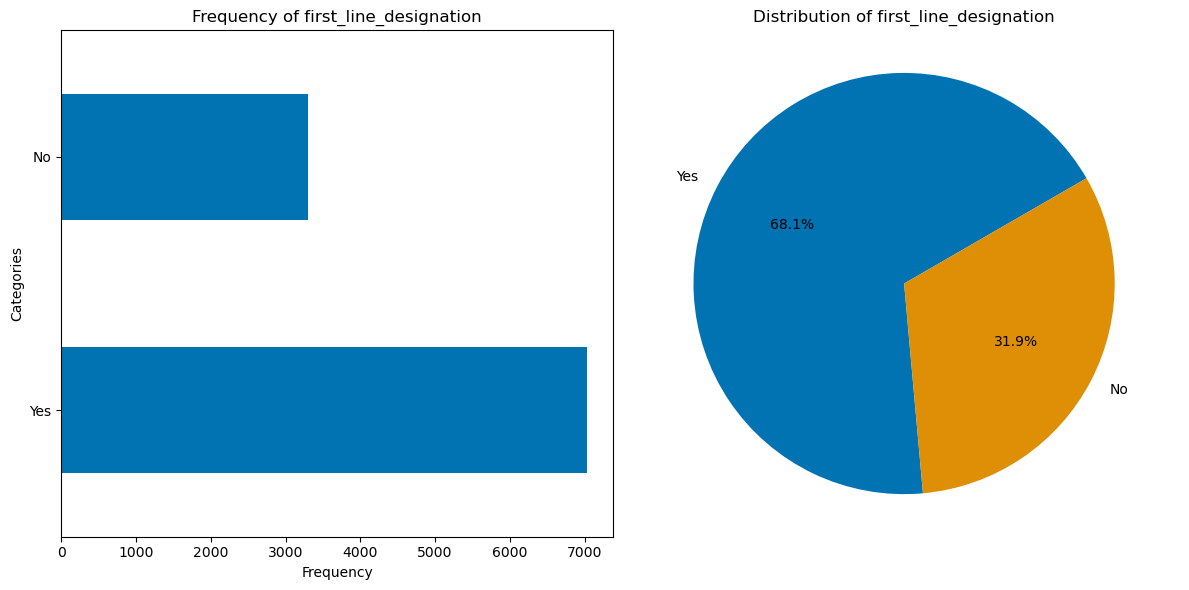

In [109]:
sns.set_palette("colorblind")
value_counts = df["first_line_designation"].value_counts()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
value_counts.plot.barh(ax=ax0)
ax0.set_title("Frequency of first_line_designation")
ax0.set_xlabel("Frequency")
ax0.set_ylabel("Categories")

ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=30)
ax1.set_title("Distribution of first_line_designation")
ax1.axis('equal')  

plt.tight_layout()
plt.show()

In [110]:
df.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'pq_first_sent_to_client_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'brand', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'shipment_mode', 'line_item_insurance_(usd)'],
      dtype='object')

###### 25.  Weights

In [111]:
df["weight_(kilograms)"].value_counts()

weight_(kilograms)
Weight Captured Separately    1507
2                               29
6                               26
1                               23
60                              20
                              ... 
1727                             1
4038                             1
1930                             1
4382                             1
1392                             1
Name: count, Length: 4688, dtype: int64

In [112]:
# Biased Data
df.drop("weight_(kilograms)",axis=1,inplace=True)

###### 24.  Freight Cost [USD]

In [113]:
df["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6733, dtype: int64

In [114]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [115]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].apply(trans_freight_cost)

In [116]:
df["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
0           1681
9736.1        36
6147.18       27
7445.8        16
13398.06      16
            ... 
52057.8        1
4312.92        1
25129.15       1
4138.11        1
3410           1
Name: count, Length: 5433, dtype: int64

In [117]:
df["freight_cost_(usd)"].describe()

count     7879
unique    5433
top          0
freq      1681
Name: freight_cost_(usd), dtype: int64

In [118]:
df.isnull().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
pq_first_sent_to_client_date     205
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
brand                              0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2445
shipment_mode                      0
line_item_insurance_(usd)          0
dtype: int64

In [119]:
median_value=df["freight_cost_(usd)"].median()
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace(np.nan,median_value)
df["freight_cost_(usd)"]

0          780.34
1          4521.5
2         1653.78
3        16007.06
4        45450.08
           ...   
10319     3549.77
10320     3549.77
10321           0
10322           0
10323           0
Name: freight_cost_(usd), Length: 10324, dtype: object

In [120]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].astype("float")

In [121]:
df["freight_cost_(usd)"].describe()

count     10324.000000
mean       7506.493322
std       13067.496507
min           0.000000
25%        1243.567500
50%        3549.770000
75%        7707.640000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

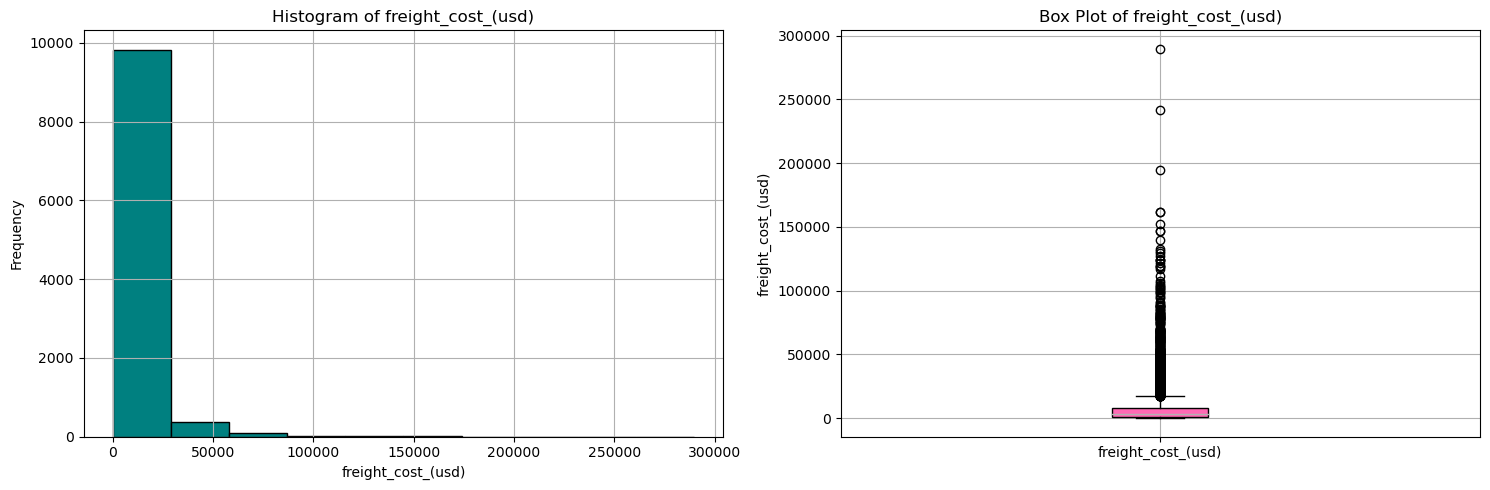

In [122]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

df['freight_cost_(usd)'].plot(kind='hist', color='teal', edgecolor='black', ax=ax1)
ax1.set_title('Histogram of freight_cost_(usd)')
ax1.set_xlabel('freight_cost_(usd)')
ax1.set_ylabel('Frequency')
ax1.grid(True)

df.boxplot(column='freight_cost_(usd)', ax=ax2, patch_artist=True, boxprops=dict(facecolor='hotpink'))
ax2.set_title('Box Plot of freight_cost_(usd)')
ax2.set_ylabel('freight_cost_(usd)')
ax2.grid(True)

plt.tight_layout()
plt.show()

###### 26.  Line Item Insurance

In [123]:
df["line_item_insurance_(usd)"].value_counts()

line_item_insurance_(usd)
47.04     289
0.00       54
0.02       37
0.07       33
0.05       30
         ... 
381.78      1
858.86      1
332.18      1
222.58      1
85.82       1
Name: count, Length: 6722, dtype: int64

In [124]:
df["line_item_insurance_(usd)"].describe()

count    10324.000000
mean       234.750202
std        494.208887
min          0.000000
25%          7.030000
50%         47.040000
75%        241.750000
max       7708.440000
Name: line_item_insurance_(usd), dtype: float64

In [125]:
df['line_item_insurance_(usd)'].isnull().sum()

0

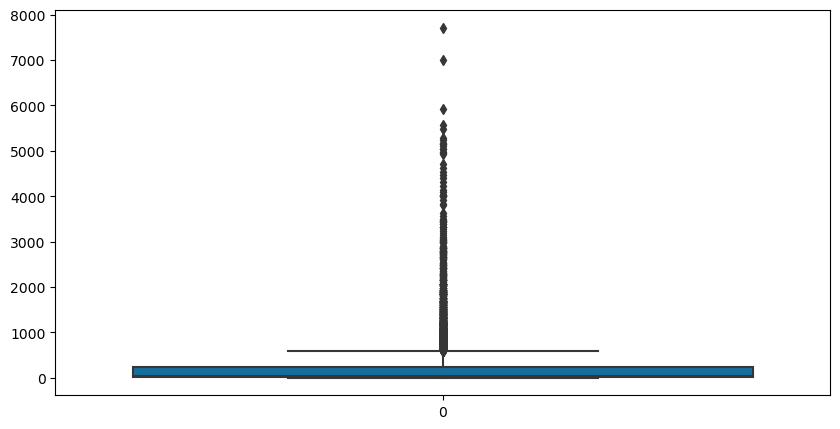

In [126]:
plt.figure(figsize=(10,5))
sns.boxplot(df["line_item_insurance_(usd)"])
plt.show()

In [127]:
df.head()

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd)
0,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,EXW,2009-06-01,2006-06-02,2006-06-02,2006-06-02,...,30,19,551.0,29.00,0.97,other,Yes,780.34,Air,47.04
1,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,2009-06-01,2006-11-14,2006-11-14,2006-11-14,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,Air,47.04
2,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,FCA,2009-06-01,2006-08-27,2006-08-27,2006-08-27,...,100,500,40000.0,80.00,0.80,other,Yes,1653.78,Air,47.04
3,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,2009-06-01,2006-09-01,2006-09-01,2006-09-01,...,60,31920,127360.8,3.99,0.07,other,Yes,16007.06,Air,47.04
4,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,2009-06-01,2006-08-11,2006-08-11,2006-08-11,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,Air,47.04


In [128]:
df.shape

(10324, 23)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   po_/_so_#                     10324 non-null  object        
 1   asn/dn_#                      10324 non-null  object        
 2   country                       10324 non-null  object        
 3   managed_by                    10324 non-null  object        
 4   fulfill_via                   10324 non-null  object        
 5   vendor_inco_term              10324 non-null  object        
 6   pq_first_sent_to_client_date  10119 non-null  datetime64[ns]
 7   scheduled_delivery_date       10324 non-null  datetime64[ns]
 8   delivered_to_client_date      10324 non-null  datetime64[ns]
 9   delivery_recorded_date        10324 non-null  datetime64[ns]
 10  product_group                 10324 non-null  object        
 11  sub_classification          

In [130]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

In [131]:
categorical_df

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,product_group,sub_classification,brand,manufacturing_site,first_line_designation,shipment_mode
0,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,EXW,HRDT,HIV Test,Reveal,other,Yes,Air
1,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,ARV,Pediatric,Generic,"Aurobindo Unit III, India",Yes,Air
2,SCMS,ASN,Côte d'Ivoire,PMO - US,Direct Drop,FCA,HRDT,HIV Test,Determine,other,Yes,Air
3,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,ARV,Adult,Generic,other,Yes,Air
4,SCMS,ASN,Vietnam,PMO - US,Direct Drop,EXW,ARV,Adult,Generic,"Aurobindo Unit III, India",Yes,Air
...,...,...,...,...,...,...,...,...,...,...,...,...
10319,SO,DN,Zimbabwe,PMO - US,From RDC,N/A - From RDC,ARV,Pediatric,Generic,other,No,Truck
10320,SO,DN,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,ARV,Adult,Generic,Hetero Unit III Hyderabad IN,No,Truck
10321,SO,DN,Zambia,PMO - US,From RDC,N/A - From RDC,ARV,Adult,Generic,other,No,Truck
10322,SO,DN,Zimbabwe,PMO - US,From RDC,N/A - From RDC,ARV,Adult,Generic,Mylan (formerly Matrix) Nashik,Yes,Truck


For Consignment Pricing, the most suitable target column would typically be the one that directly represents the price or cost associated with the consignment. The most appropriate target column for consignment pricing could be: Line Item Value.
This column represents the total value of each line item in the consignment. It directly reflects the monetary value of the products included in the consignment and is likely the primary factor influencing pricing decisions. Therefore, using "Line Item Value" as the target column would be reasonable for modeling Consignment Pricing.

#### Bivariate Analysis

###### Categorical Columns vs Line Item Value

In [132]:
def plot_categorical(column_name, data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar Plot
    sns.barplot(x=column_name, y='line_item_value', data=data, ax=ax1)
    ax1.set_title(f'Bar Plot of {column_name} vs Line Item Value')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Line Item Value')
    
    # Box Plot
    sns.boxplot(x=column_name, y='line_item_value', data=data, ax=ax2)
    ax2.set_title(f'Box Plot of {column_name} vs Line Item Value')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Line Item Value')
    
    plt.tight_layout()
    plt.show()

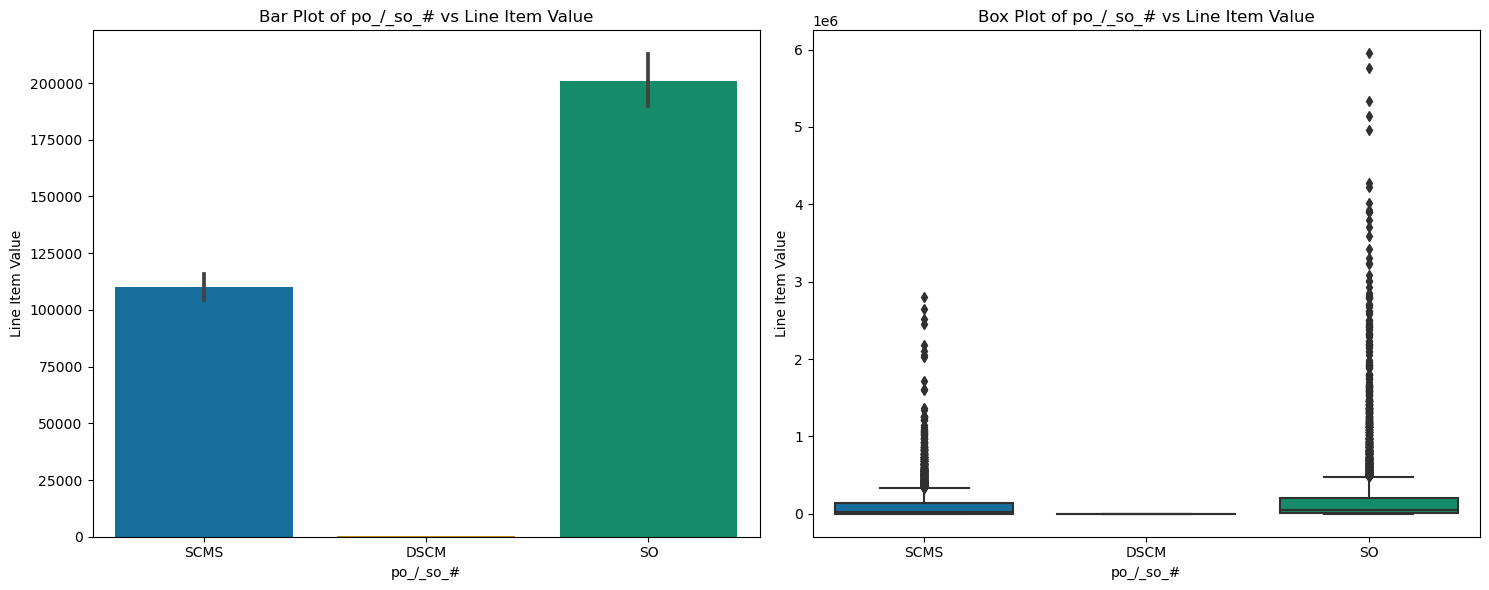

In [133]:
plot_categorical('po_/_so_#', df)

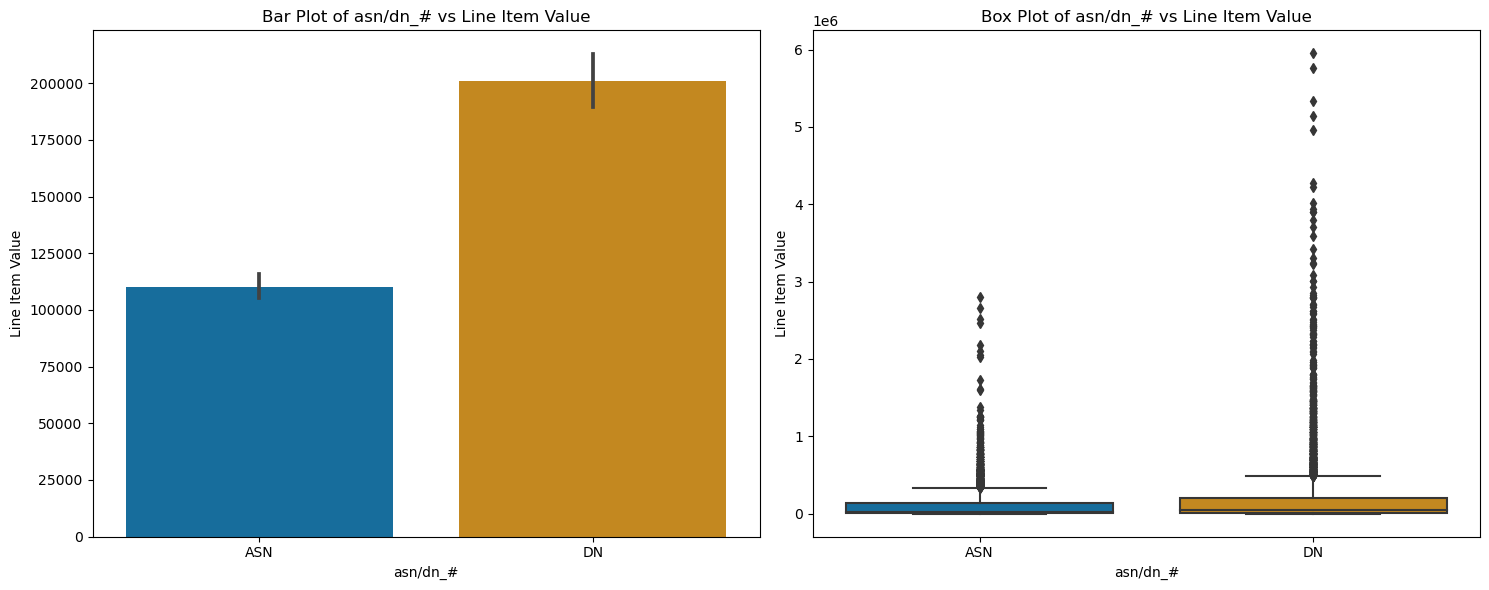

In [134]:
plot_categorical('asn/dn_#', df)

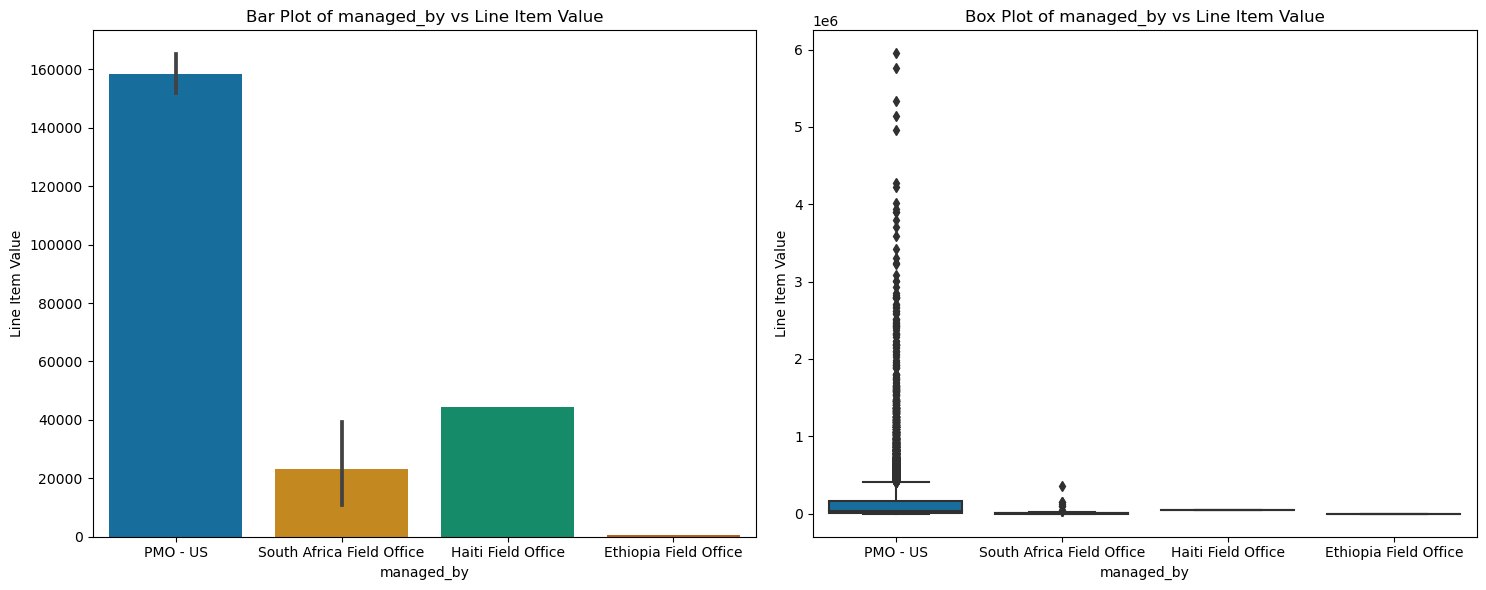

In [135]:
plot_categorical('managed_by', df)

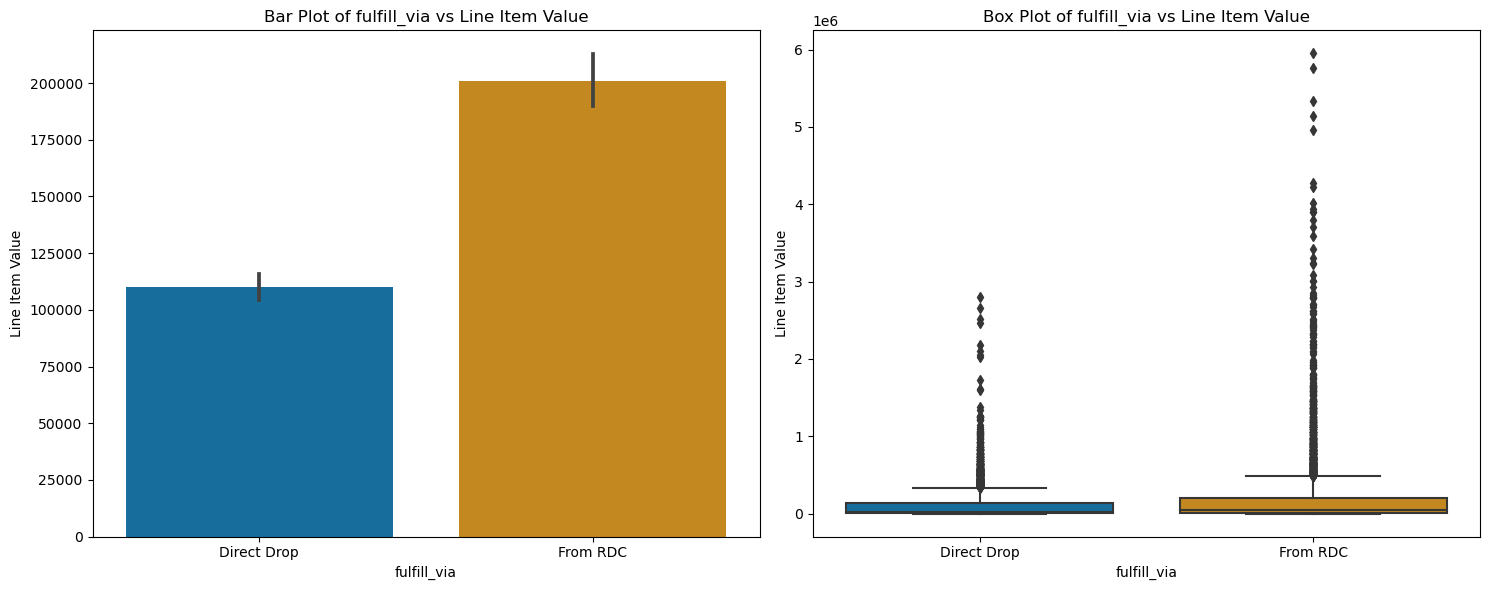

In [136]:
plot_categorical('fulfill_via', df)

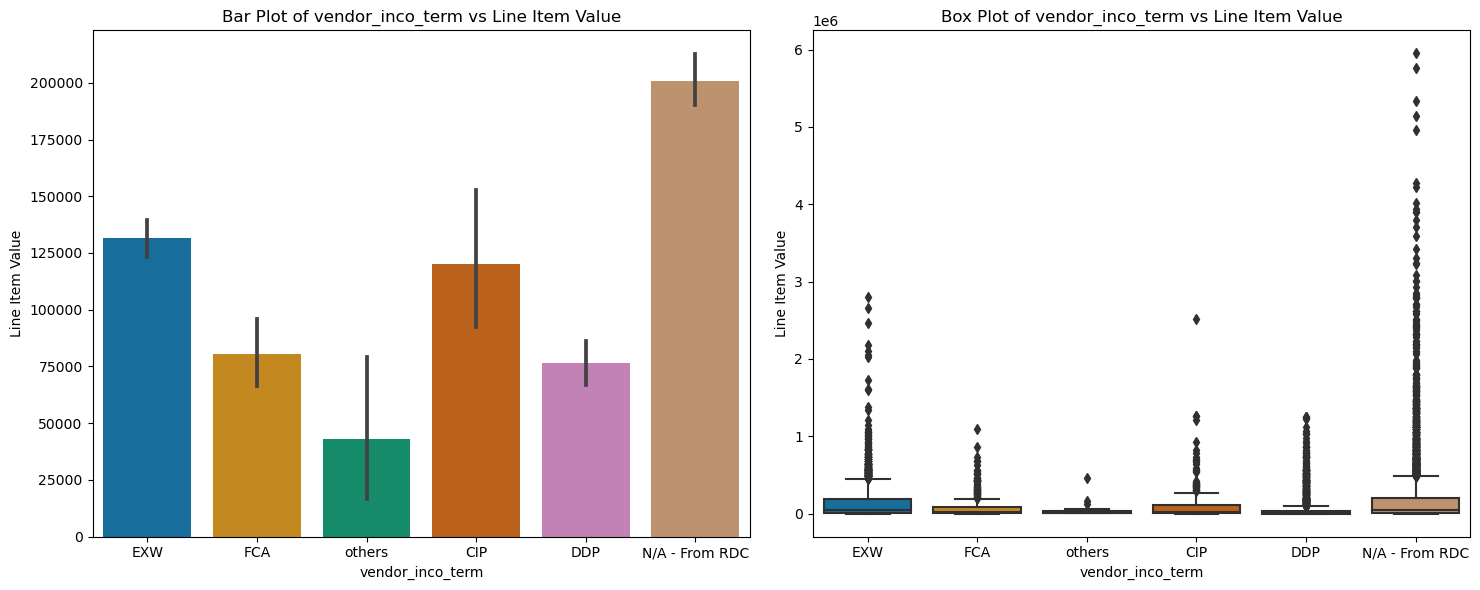

In [137]:
plot_categorical('vendor_inco_term', df)

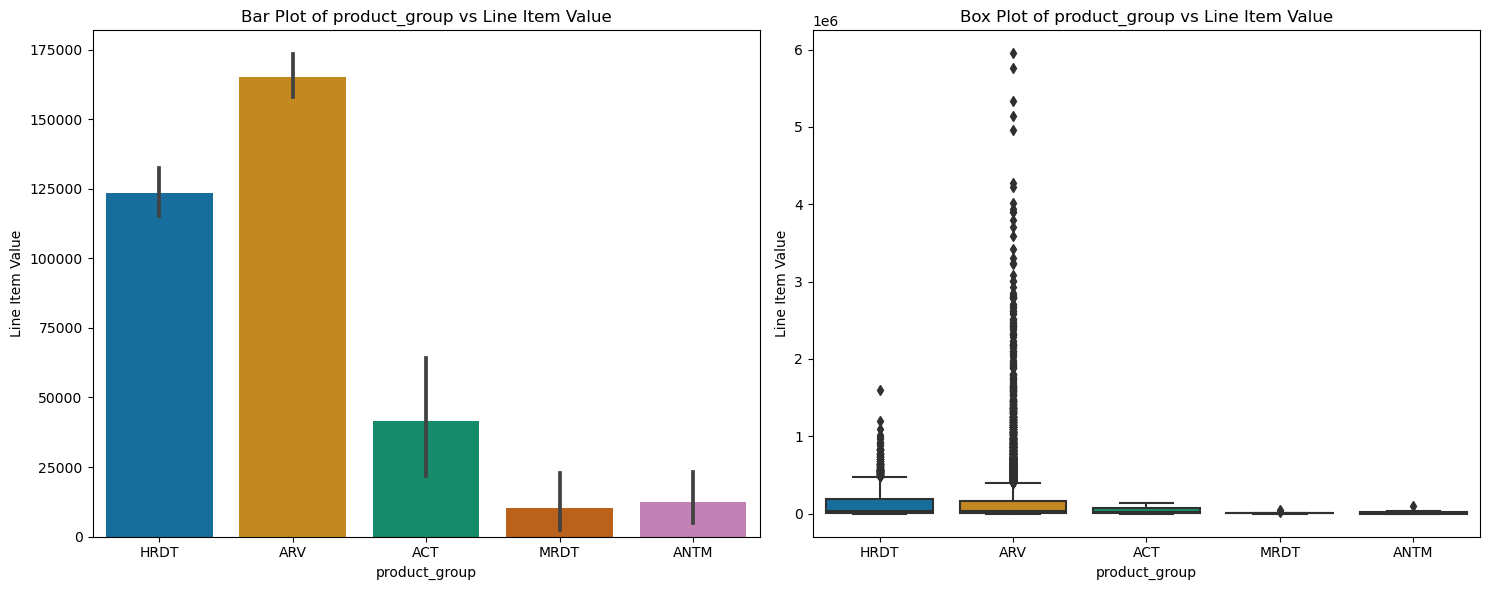

In [138]:
plot_categorical('product_group', df)

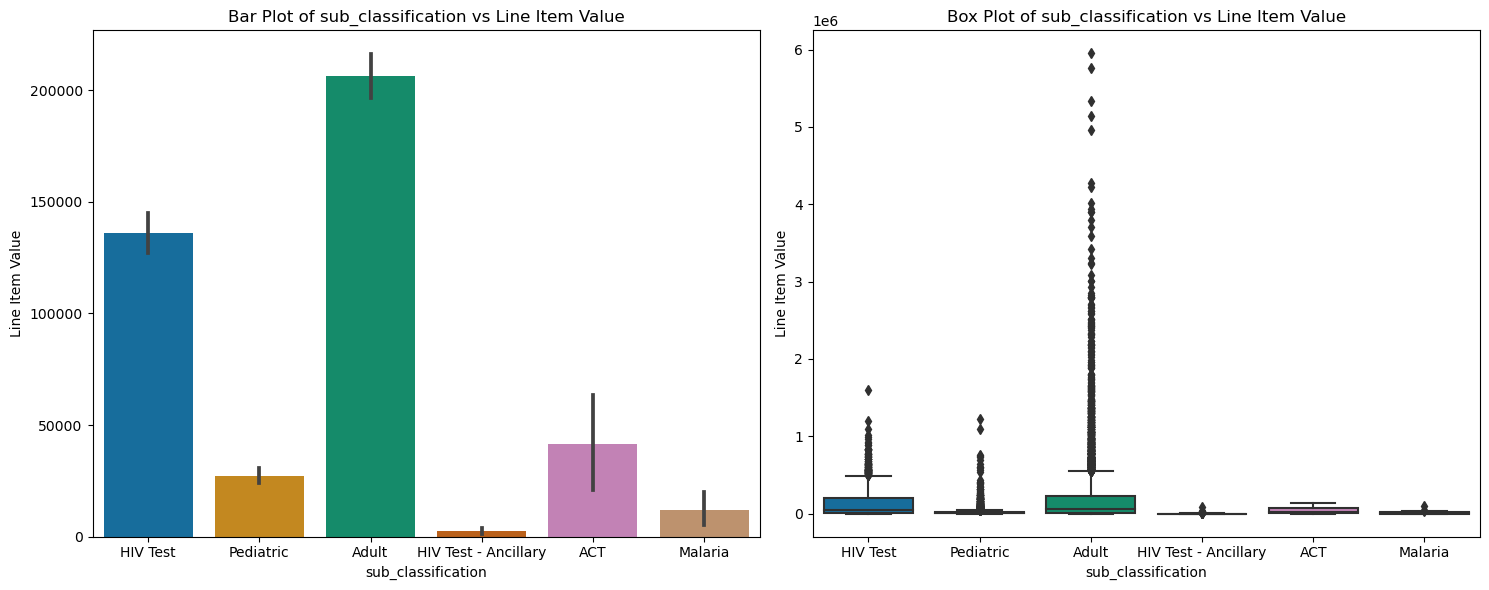

In [139]:
plot_categorical('sub_classification', df)

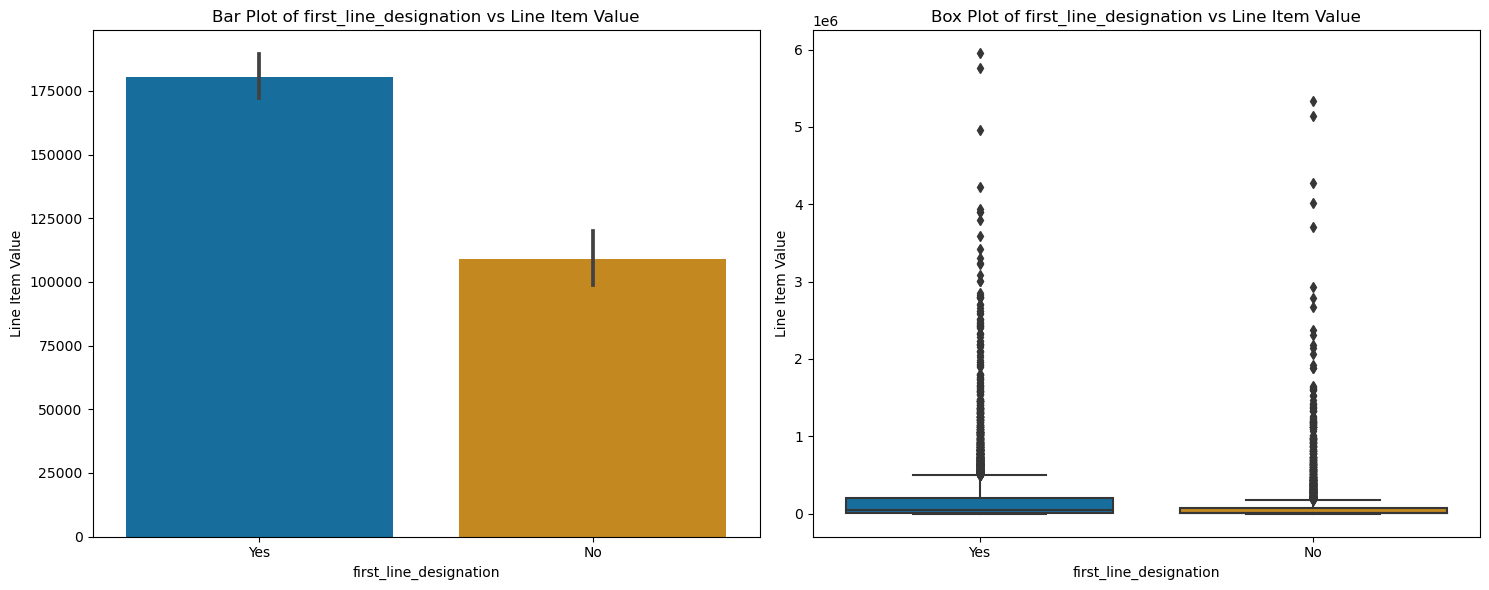

In [140]:
plot_categorical('first_line_designation', df)

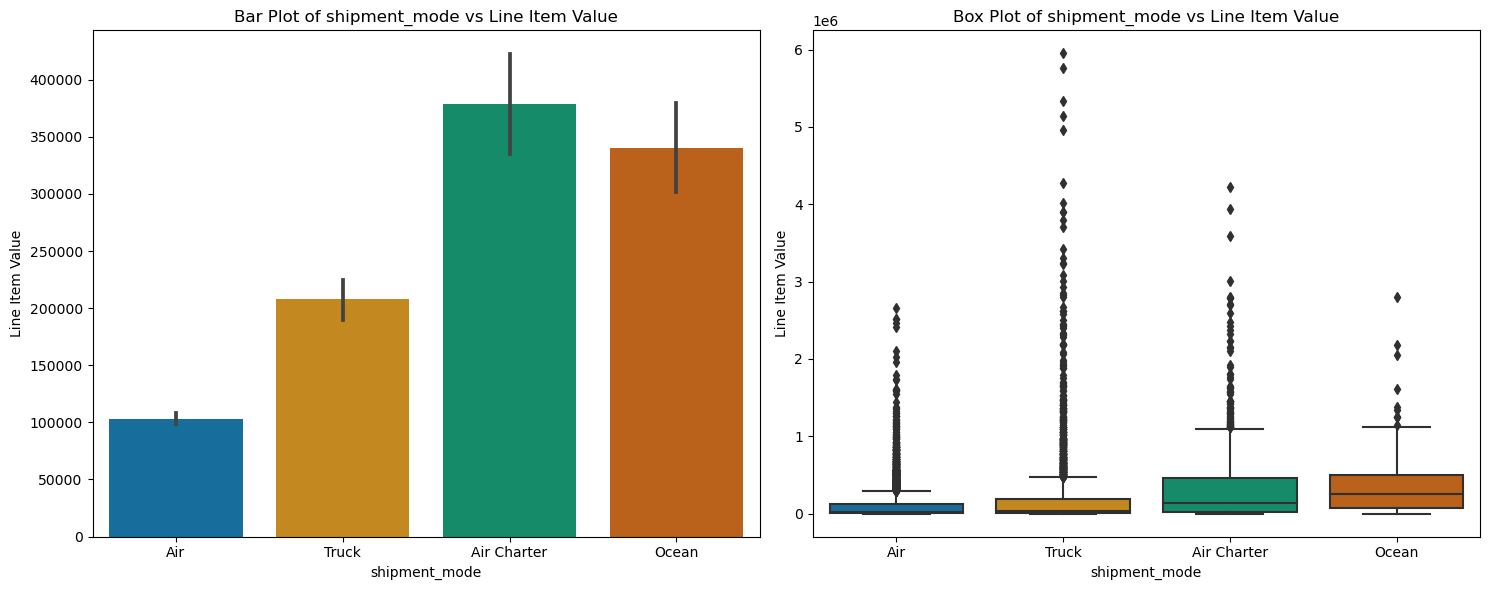

In [141]:
plot_categorical('shipment_mode', df)

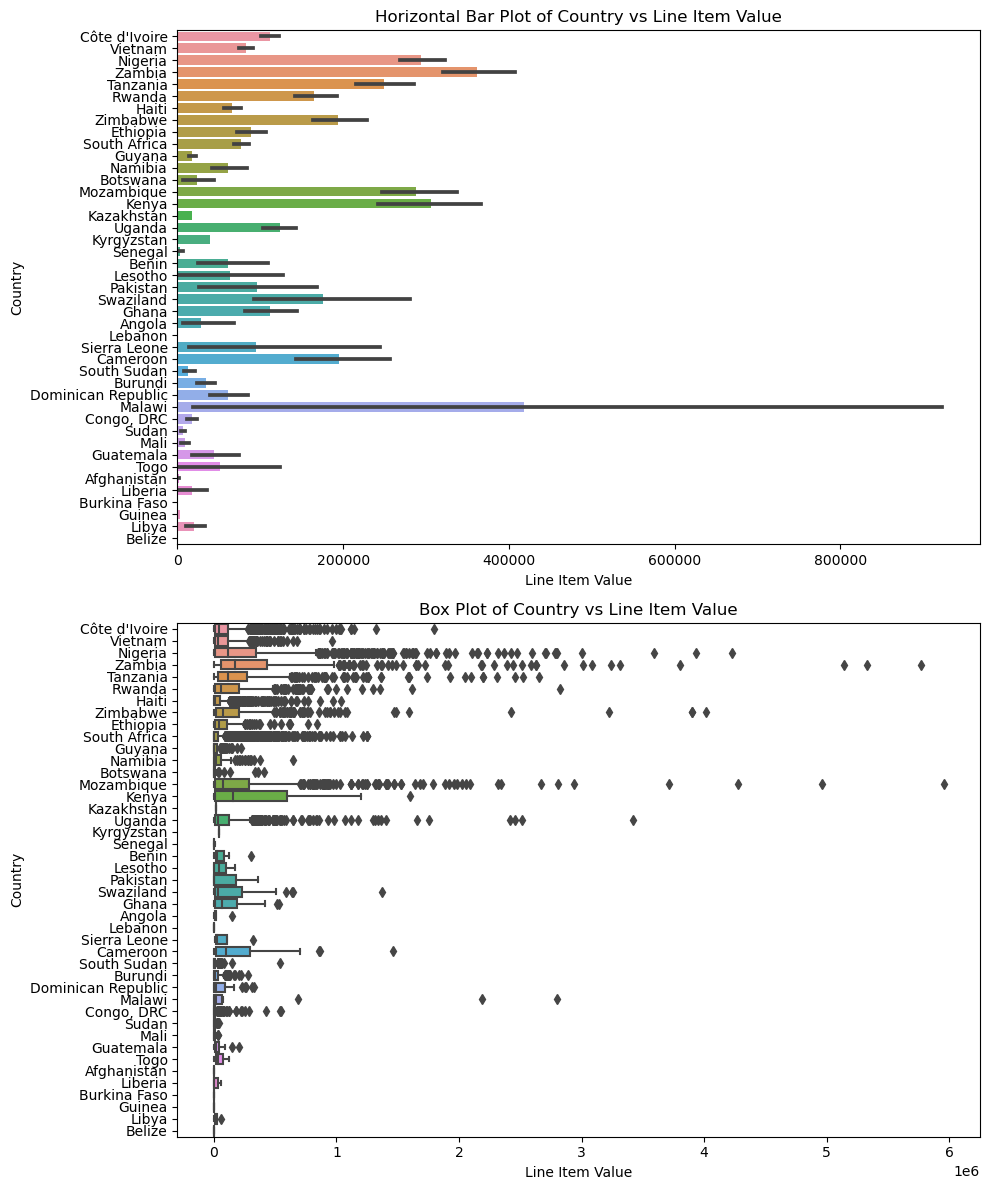

In [142]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(y='country', x='line_item_value', data=df, ax=axes[0])
axes[0].set_title('Horizontal Bar Plot of Country vs Line Item Value')
axes[0].set_ylabel('Country')
axes[0].set_xlabel('Line Item Value')

sns.boxplot(y='country', x='line_item_value', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Country vs Line Item Value')
axes[1].set_ylabel('Country')
axes[1].set_xlabel('Line Item Value')

plt.tight_layout()
plt.show()

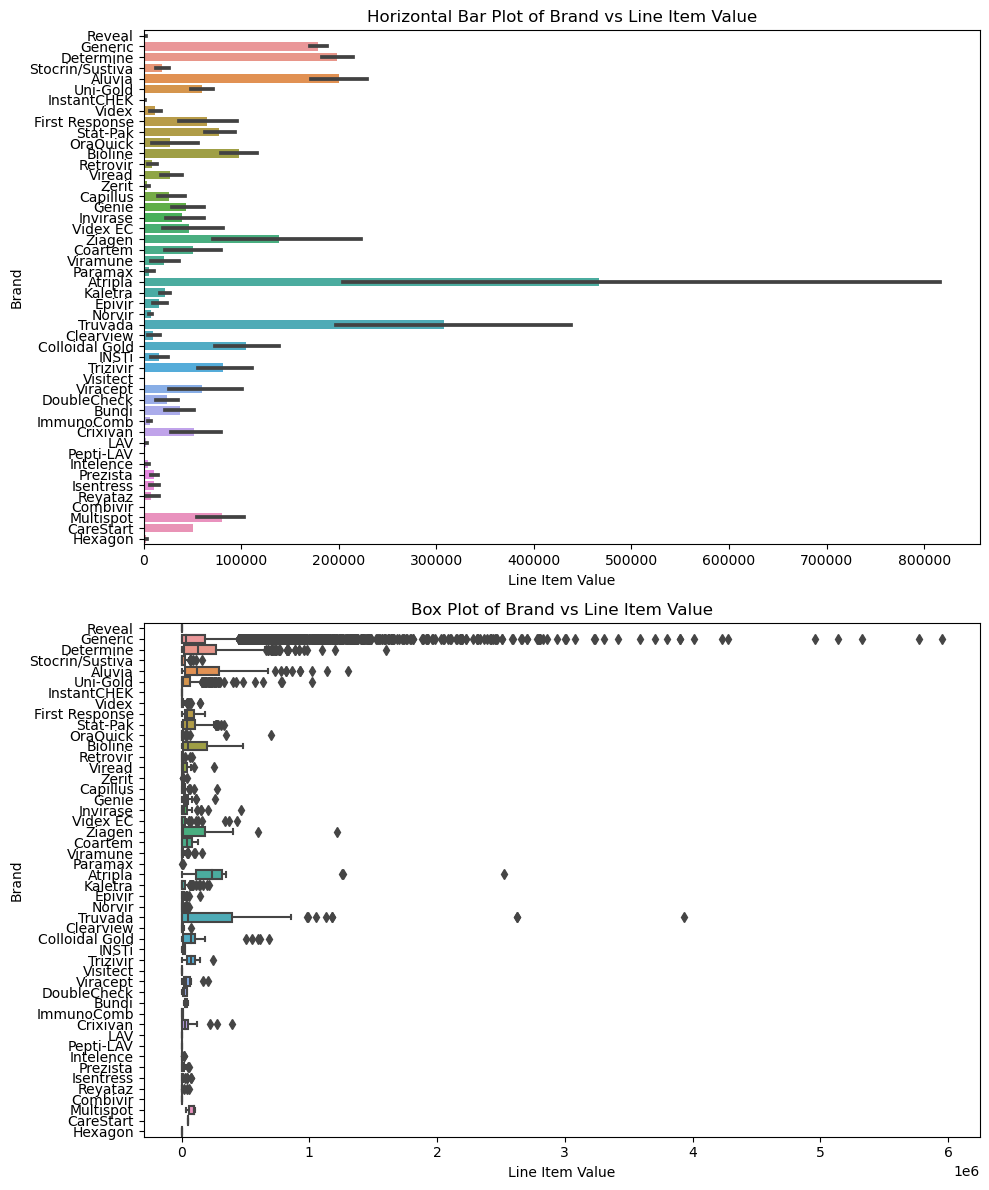

In [143]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(y='brand', x='line_item_value', data=df, ax=axes[0])
axes[0].set_title('Horizontal Bar Plot of Brand vs Line Item Value')
axes[0].set_ylabel('Brand')
axes[0].set_xlabel('Line Item Value')

sns.boxplot(y='brand', x='line_item_value', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Brand vs Line Item Value')
axes[1].set_ylabel('Brand')
axes[1].set_xlabel('Line Item Value')

plt.tight_layout()
plt.show()

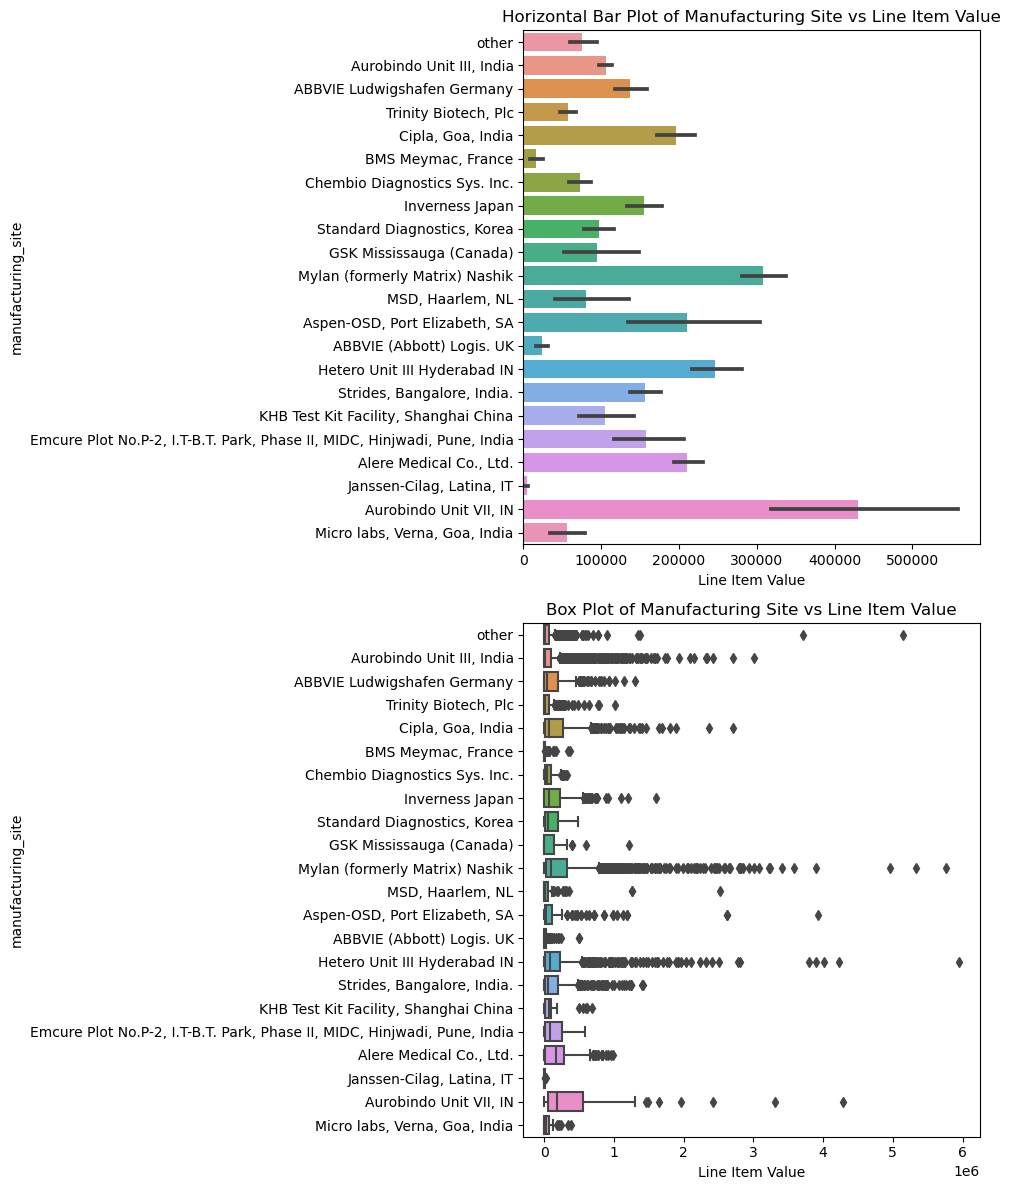

In [144]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(y='manufacturing_site', x='line_item_value', data=df, ax=axes[0])
axes[0].set_title('Horizontal Bar Plot of Manufacturing Site vs Line Item Value')
axes[0].set_ylabel('manufacturing_site')
axes[0].set_xlabel('Line Item Value')

sns.boxplot(y='manufacturing_site', x='line_item_value', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Manufacturing Site vs Line Item Value')
axes[1].set_ylabel('manufacturing_site')
axes[1].set_xlabel('Line Item Value')

plt.tight_layout()
plt.show()

In [145]:
numerical_df

,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,freight_cost_(usd),line_item_insurance_(usd)
0,30,19,551.00,29.00,0.97,780.34,47.04
1,240,1000,6200.00,6.20,0.03,4521.50,47.04
2,100,500,40000.00,80.00,0.80,1653.78,47.04
3,60,31920,127360.80,3.99,0.07,16007.06,47.04
4,60,38000,121600.00,3.20,0.05,45450.08,47.04
...,...,...,...,...,...,...,...
10319,60,166571,599655.60,3.60,0.06,3549.77,705.79
10320,60,21072,137389.44,6.52,0.11,3549.77,161.71
10321,30,514526,5140114.74,9.99,0.33,0.00,5284.04
10322,60,17465,113871.80,6.52,0.11,0.00,134.03


#### Scatter Plot
##### Check for Relationship between Numerical Columns and Item Line Value

In [146]:
numerical_columns = ['unit_of_measure_(per_pack)', 'line_item_quantity', 'pack_price', 
                     'unit_price', 'freight_cost_(usd)', 'line_item_insurance_(usd)']

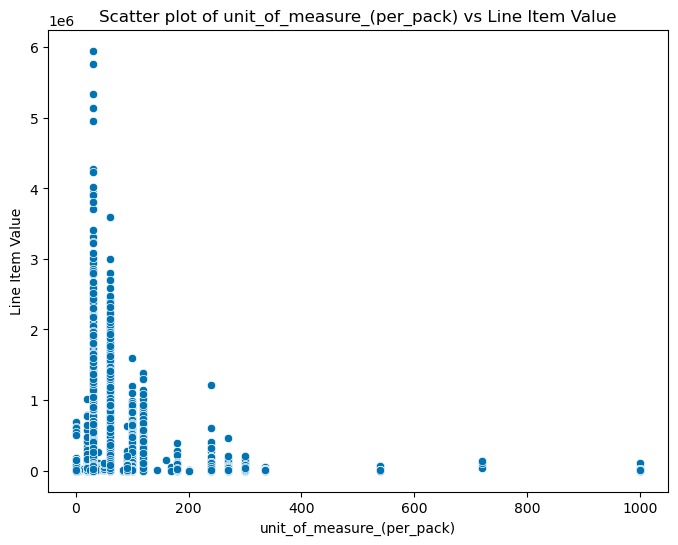

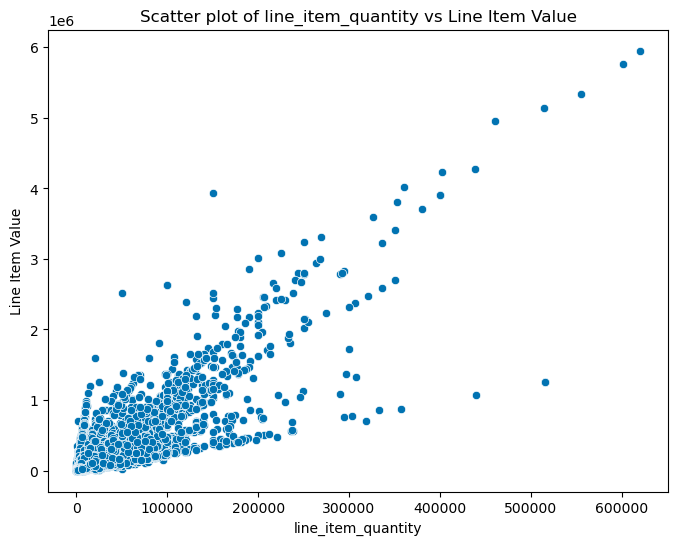

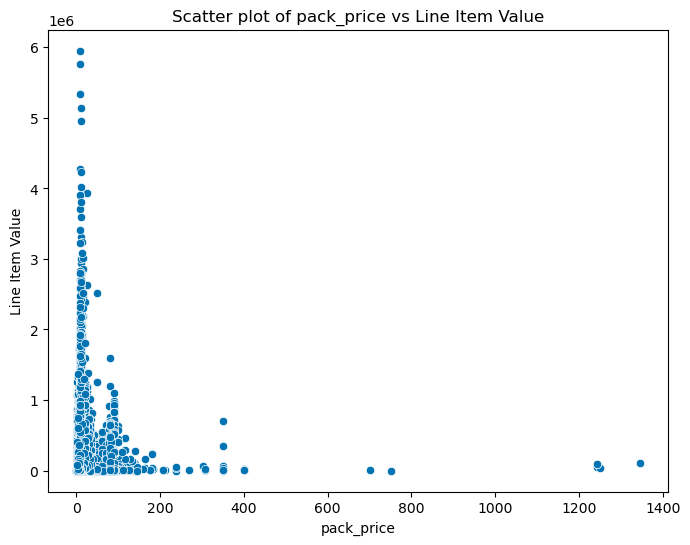

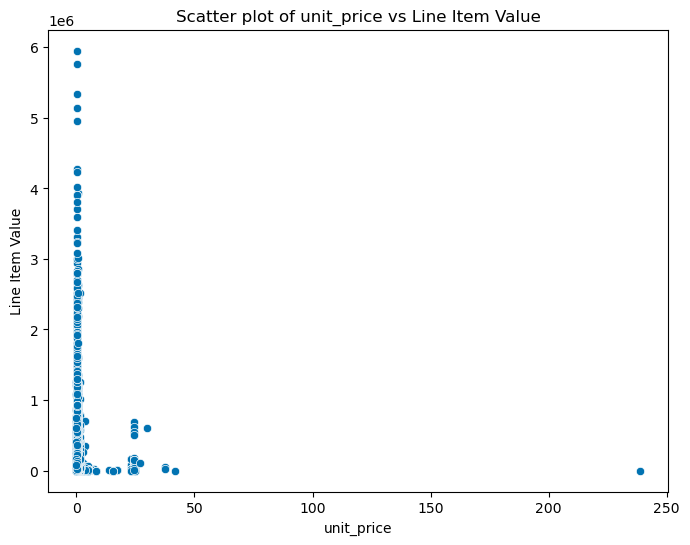

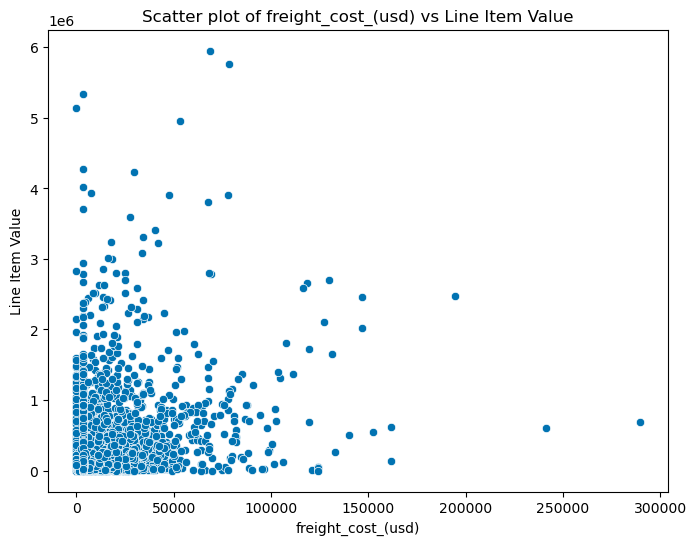

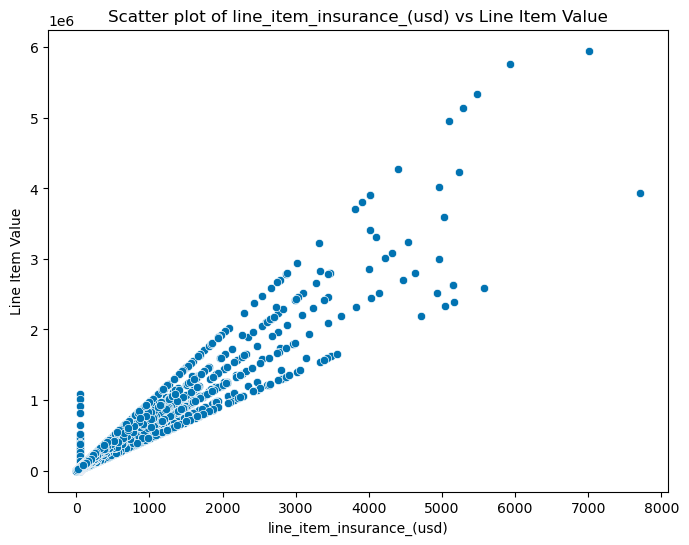

In [147]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='line_item_value', data=df)
    plt.title(f'Scatter plot of {col} vs Line Item Value')
    plt.xlabel(col)
    plt.ylabel('Line Item Value')
    plt.show()

###### Add 'Day to Process' Column

In [148]:
df["days_to_process"]=df["delivery_recorded_date"]-df["pq_first_sent_to_client_date"]

In [149]:
df["days_to_process"] = pd.to_timedelta(df["days_to_process"])

In [150]:
df["days_to_process"].max()

Timedelta('726 days 00:00:00')

In [151]:
df["days_to_process"].min()

Timedelta('-1126 days +00:00:00')

In [152]:
median_days_to_process = df['days_to_process'].median()
df['days_to_process'].fillna(median_days_to_process, inplace=True)

In [153]:
df['days_to_process'] = df['days_to_process'].dt.days.astype('int64')

In [154]:
df['days_to_process']

0       -1095
1        -930
2       -1009
3       -1004
4       -1025
         ... 
10319     277
10320     287
10321     269
10322     216
10323     299
Name: days_to_process, Length: 10324, dtype: int64

In [155]:
df.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date"],axis=1,inplace=True)

In [156]:
df.drop(["delivered_to_client_date"],axis=1,inplace=True)

# Feature Engineering 

#### 1. Treating Outliers

In [157]:
# Outlier Detection
def outlier_detection(data,colname):
    data=data[data[colname]<=(data[colname].mean()+3*data[colname].std())]
    return data

In [158]:
df0=outlier_detection(df,"line_item_value")
df0.shape

(10131, 20)

In [159]:
df1=outlier_detection(df0,"unit_of_measure_(per_pack)")
df0.shape,df1.shape

((10131, 20), (10064, 20))

In [160]:
df2=outlier_detection(df1,"pack_price")
df1.shape,df2.shape

((10064, 20), (9992, 20))

In [161]:
df3=outlier_detection(df2,"unit_price")
df3.shape

(9904, 20)

In [162]:
df4=outlier_detection(df3,"days_to_process")
df4.shape

(9904, 20)

In [163]:
df=df4.copy()

In [164]:
numerical_df

,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,freight_cost_(usd),line_item_insurance_(usd)
0,30,19,551.00,29.00,0.97,780.34,47.04
1,240,1000,6200.00,6.20,0.03,4521.50,47.04
2,100,500,40000.00,80.00,0.80,1653.78,47.04
3,60,31920,127360.80,3.99,0.07,16007.06,47.04
4,60,38000,121600.00,3.20,0.05,45450.08,47.04
...,...,...,...,...,...,...,...
10319,60,166571,599655.60,3.60,0.06,3549.77,705.79
10320,60,21072,137389.44,6.52,0.11,3549.77,161.71
10321,30,514526,5140114.74,9.99,0.33,0.00,5284.04
10322,60,17465,113871.80,6.52,0.11,0.00,134.03


In [165]:
df.shape

(9904, 20)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9904 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   9904 non-null   object 
 1   asn/dn_#                    9904 non-null   object 
 2   country                     9904 non-null   object 
 3   managed_by                  9904 non-null   object 
 4   fulfill_via                 9904 non-null   object 
 5   vendor_inco_term            9904 non-null   object 
 6   product_group               9904 non-null   object 
 7   sub_classification          9904 non-null   object 
 8   brand                       9904 non-null   object 
 9   unit_of_measure_(per_pack)  9904 non-null   int64  
 10  line_item_quantity          9904 non-null   int64  
 11  line_item_value             9904 non-null   float64
 12  pack_price                  9904 non-null   float64
 13  unit_price                  9904 non-

#### 2. Encoding Categorical Values

In [167]:
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5211
SCMS    4693
Name: count, dtype: int64

In [168]:
df["po_/_so_#"].value_counts()
df["po_/_so_#"] = pd.get_dummies(df["po_/_so_#"], drop_first=True).astype(int)

In [169]:
df["po_/_so_#"].head(2)

0    0
1    0
Name: po_/_so_#, dtype: int32

In [170]:
df["asn/dn_#"].value_counts()

asn/dn_#
DN     5211
ASN    4693
Name: count, dtype: int64

In [171]:
df["asn/dn_#"].value_counts()
df["asn/dn_#"] = pd.get_dummies(df["asn/dn_#"], drop_first=True).astype(int)

In [172]:
df["asn/dn_#"].head(2)

0    0
1    0
Name: asn/dn_#, dtype: int32

In [173]:
df["country"].value_counts()

country
South Africa          1402
Nigeria               1107
Côte d'Ivoire         1064
Uganda                 762
Vietnam                673
Zambia                 648
Haiti                  615
Mozambique             588
Zimbabwe               528
Tanzania               494
Rwanda                 403
Congo, DRC             326
Guyana                 237
Ethiopia               181
South Sudan            164
Kenya                  108
Burundi                 97
Namibia                 95
Cameroon                67
Ghana                   58
Dominican Republic      51
Sudan                   46
Botswana                44
Swaziland               34
Pakistan                15
Benin                   13
Malawi                  12
Guatemala               12
Mali                    12
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Senegal                  3
Togo                     3
Kyrgyzstan          

In [174]:
df["country"].value_counts()
frequency=df["country"].value_counts().to_dict()
df["country"]=df["country"].map(frequency)

In [175]:
df["country"].value_counts()

country
1402    1402
1107    1107
1064    1064
762      762
673      673
648      648
615      615
588      588
528      528
494      494
403      403
326      326
237      237
181      181
164      164
108      108
97        97
95        95
67        67
58        58
51        51
46        46
44        44
12        36
34        34
8         16
15        15
13        13
7          7
6          6
3          6
2          6
4          4
1          3
Name: count, dtype: int64

In [176]:
df["fulfill_via"].value_counts()

fulfill_via
From RDC       5211
Direct Drop    4693
Name: count, dtype: int64

In [177]:
df["fulfill_via"].value_counts()
df["fulfill_via"]=pd.get_dummies(df["fulfill_via"],drop_first=True).astype(int)

In [178]:
df["fulfill_via"].head(1)

0    0
Name: fulfill_via, dtype: int32

In [179]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [180]:
df["vendor_inco_term"].value_counts()
df["vendor_inco_term"]=lr.fit_transform(df["vendor_inco_term"])

In [181]:
df["vendor_inco_term"].value_counts()

vendor_inco_term
4    5211
2    2609
1    1431
3     367
0     261
5      25
Name: count, dtype: int64

In [182]:
df["sub_classification"].value_counts()
df["sub_classification"]=lr.fit_transform(df["sub_classification"])

In [183]:
df["manufacturing_site"].value_counts()

manufacturing_site
Aurobindo Unit III, India                                                   3145
Mylan (formerly Matrix) Nashik                                              1326
Hetero Unit III Hyderabad IN                                                 835
other                                                                        675
Cipla, Goa, India                                                            652
Strides, Bangalore, India.                                                   534
Alere Medical Co., Ltd.                                                      480
Trinity Biotech, Plc                                                         399
ABBVIE Ludwigshafen Germany                                                  365
Inverness Japan                                                              343
ABBVIE (Abbott) Logis. UK                                                    190
BMS Meymac, France                                                           148
Aspen-OSD

In [184]:
df.drop(["manufacturing_site"],axis=1,inplace=True)

In [185]:
df["first_line_designation"]=pd.get_dummies(df["first_line_designation"],drop_first=True).astype(int)

In [186]:
df["shipment_mode"].value_counts()
df["shipment_mode"]=lr.fit_transform(df["shipment_mode"])

In [187]:
df

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,product_group,sub_classification,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,0,0,1064,PMO - US,0,2,HRDT,2,Reveal,30,19,551.00,29.00,0.97,1,780.34,0,47.04,-1095
1,0,0,673,PMO - US,0,2,ARV,5,Generic,240,1000,6200.00,6.20,0.03,1,4521.50,0,47.04,-930
2,0,0,1064,PMO - US,0,3,HRDT,2,Determine,100,500,40000.00,80.00,0.80,1,1653.78,0,47.04,-1009
3,0,0,673,PMO - US,0,2,ARV,1,Generic,60,31920,127360.80,3.99,0.07,1,16007.06,0,47.04,-1004
4,0,0,673,PMO - US,0,2,ARV,1,Generic,60,38000,121600.00,3.20,0.05,1,45450.08,0,47.04,-1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,1,1,528,PMO - US,1,4,ARV,5,Generic,60,205243,738874.80,3.60,0.06,0,3549.77,3,869.66,277
10319,1,1,528,PMO - US,1,4,ARV,5,Generic,60,166571,599655.60,3.60,0.06,0,3549.77,3,705.79,277
10320,1,1,1064,PMO - US,1,4,ARV,1,Generic,60,21072,137389.44,6.52,0.11,0,3549.77,3,161.71,287
10322,1,1,528,PMO - US,1,4,ARV,1,Generic,60,17465,113871.80,6.52,0.11,1,0.00,3,134.03,216


In [188]:
df["managed_by"].value_counts()

managed_by
PMO - US                     9846
South Africa Field Office      57
Ethiopia Field Office           1
Name: count, dtype: int64

In [189]:
df["managed_by"].value_counts()
df["managed_by"]=lr.fit_transform(df["managed_by"])

In [190]:
df["product_group"].value_counts()

product_group
ARV     8311
HRDT    1575
MRDT       8
ANTM       6
ACT        4
Name: count, dtype: int64

In [191]:
df["product_group"].value_counts()
df["product_group"]=lr.fit_transform(df["product_group"])

In [192]:
df["brand"].value_counts()

brand
Generic            7086
Determine           796
Uni-Gold            369
Aluvia              248
Kaletra             164
Stat-Pak            115
Bioline             113
Norvir               97
Truvada              91
Videx                84
Stocrin/Sustiva      69
Viread               52
Invirase             51
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             40
Ziagen               36
Crixivan             36
Intelence            32
Capillus             30
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              17
First Response       15
Atripla              13
Viracept              8
DoubleCheck           5
INSTi                 5
Paramax               5
Combivir              3
Reveal                3
ImmunoComb            3
Hexagon               3
InstantCHEK           2
OraQuick              1
Visitect              1
CareStart 

In [193]:
df.drop(["brand"],axis=1,inplace=True)

In [194]:
df

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,product_group,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,0,0,1064,1,0,2,3,2,30,19,551.00,29.00,0.97,1,780.34,0,47.04,-1095
1,0,0,673,1,0,2,2,5,240,1000,6200.00,6.20,0.03,1,4521.50,0,47.04,-930
2,0,0,1064,1,0,3,3,2,100,500,40000.00,80.00,0.80,1,1653.78,0,47.04,-1009
3,0,0,673,1,0,2,2,1,60,31920,127360.80,3.99,0.07,1,16007.06,0,47.04,-1004
4,0,0,673,1,0,2,2,1,60,38000,121600.00,3.20,0.05,1,45450.08,0,47.04,-1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,1,1,528,1,1,4,2,5,60,205243,738874.80,3.60,0.06,0,3549.77,3,869.66,277
10319,1,1,528,1,1,4,2,5,60,166571,599655.60,3.60,0.06,0,3549.77,3,705.79,277
10320,1,1,1064,1,1,4,2,1,60,21072,137389.44,6.52,0.11,0,3549.77,3,161.71,287
10322,1,1,528,1,1,4,2,1,60,17465,113871.80,6.52,0.11,1,0.00,3,134.03,216


#### 3. Correlation Coefficient

In [195]:
# Find and Remove Correlated Features
def correlation(dataset, threshold):
    col_corr = set()    
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:     
                colname = corr_matrix.columns[i]               
                col_corr.add(colname)
    return col_corr

In [196]:
# Checking the Highly Correlated Features
correlation(df, 0.7) 

{'asn/dn_#',
 'fulfill_via',
 'line_item_insurance_(usd)',
 'line_item_value',
 'vendor_inco_term'}

In [197]:
df.drop(['asn/dn_#', 'fulfill_via', 'line_item_insurance_(usd)', 'vendor_inco_term'], axis=1, inplace=True)

Dropping Highly Correlated Features and Leaving Line Item Value as It is Our Correlated Features.

#### 4. VIF (Variance Inflation Factor)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF 
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    return vif

In [199]:
calc_vif(df[[i for i in df.describe().columns]])

,VIF Factor,features
0,2.779511,po_/_so_#
1,5.782684,country
2,63.817049,managed_by
3,64.136237,product_group
4,4.605352,sub_classification
5,4.906244,unit_of_measure_(per_pack)
6,3.466690,line_item_quantity
7,3.780269,line_item_value
8,3.794740,pack_price
9,3.129600,unit_price


Since the VIF factor of 'managed_by','product_group' is large hence , remove to build the model.

In [200]:
df.drop(['managed_by','product_group'], axis=1, inplace=True)

In [201]:
df.shape

(9904, 12)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9904 entries, 0 to 10323
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   9904 non-null   int32  
 1   country                     9904 non-null   int64  
 2   sub_classification          9904 non-null   int32  
 3   unit_of_measure_(per_pack)  9904 non-null   int64  
 4   line_item_quantity          9904 non-null   int64  
 5   line_item_value             9904 non-null   float64
 6   pack_price                  9904 non-null   float64
 7   unit_price                  9904 non-null   float64
 8   first_line_designation      9904 non-null   int32  
 9   freight_cost_(usd)          9904 non-null   float64
 10  shipment_mode               9904 non-null   int32  
 11  days_to_process             9904 non-null   int64  
dtypes: float64(4), int32(4), int64(4)
memory usage: 851.1 KB


In [203]:
df

,po_/_so_#,country,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,days_to_process
0,0,1064,2,30,19,551.00,29.00,0.97,1,780.34,0,-1095
1,0,673,5,240,1000,6200.00,6.20,0.03,1,4521.50,0,-930
2,0,1064,2,100,500,40000.00,80.00,0.80,1,1653.78,0,-1009
3,0,673,1,60,31920,127360.80,3.99,0.07,1,16007.06,0,-1004
4,0,673,1,60,38000,121600.00,3.20,0.05,1,45450.08,0,-1025
...,...,...,...,...,...,...,...,...,...,...,...,...
10318,1,528,5,60,205243,738874.80,3.60,0.06,0,3549.77,3,277
10319,1,528,5,60,166571,599655.60,3.60,0.06,0,3549.77,3,277
10320,1,1064,1,60,21072,137389.44,6.52,0.11,0,3549.77,3,287
10322,1,528,1,60,17465,113871.80,6.52,0.11,1,0.00,3,216


<Axes: >

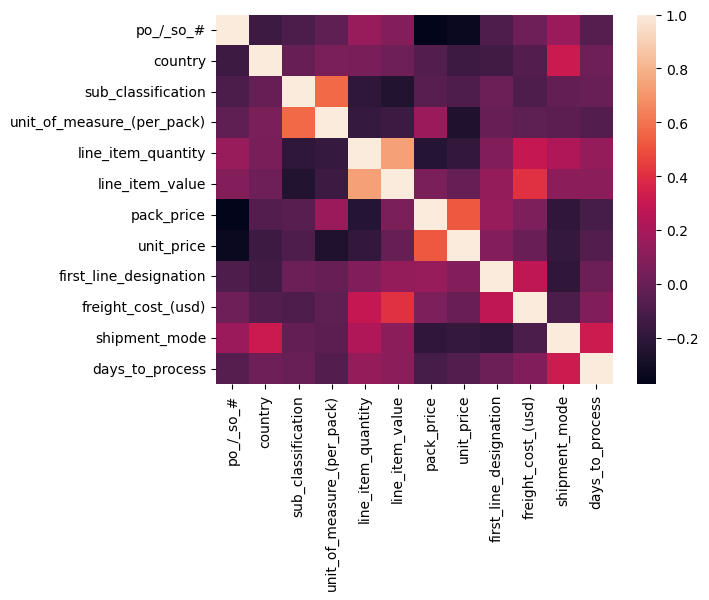

In [204]:
sns.heatmap(df.corr())

In [205]:
# Save Cleaned DataFrame to a CSV File
df.to_csv('Consignment.csv', index=False)